# Title of ML project: 
## AIR QUALITY INDEX PREDICTION

—-----------------------------------------------------------------------------------------------------------

Name:FARSEENA C

Organization:Entri Elevate

Date: 19-04-2024

In [ ]:
—---------------------------------------------------------------------------------------------------------

#  1.Overview of Problem Statement

Humans can only survive because of air. Its quality must be monitored and understood for our wellbeing. Due to air pollution, millions of people around the world suffer from physiological disorders and respiratory death. According to scientific evidence, air pollution poses the single greatest environmental risk. Due to the toxic gas emissions caused by rapid industrialization, population levels have dramatically increased. Our health is suffering greatly as a result of the air being contaminated by hazardous substances. Due to this unchecked pollution, air quality has significantly declined.An index for reporting air quality is called the air quality index (AQI). It measures the impact of air pollution on a person’s health over a short period of time. The purpose of the AQI is to educate the public on the negative health effects of local air pollution



# 2. objective:

Our goal is to predict the AQI, so this task is either Classification or regression. So as our class label is continuous, regression technique is required. Thereby developing an effective prediction model can aid in proactive management and conservation efforts.


# 3.Data Description :  
The dataset includes hourly and daily air quality and AQI (air quality index) data from numerous stations in several Indian cities. The data are for the years 2015 through 2020. The original dataset included 29531 rows and 16 columns, which included all of the cities listed below. The cities are given below:

Ahmedabad, Aizawl, Amaravati, Amritsar, Bangalore, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, and Visakhapatnam.

   - Source: https://www.kaggle.com/datasets/anjusunilkumar/air-quality-prediction?resource=download
   - Features: The attribute information is given below.


 City
 Date YYYY-MM-DD, City, 
 PM2.5-Particulate Matter (PM2'5) describes fine inhalable particles,with diameters 2.5 micrometers or small
 PM10-Particulate Matter 10 micrometers or less in diameter
 NO-Nitrogen Monoxide
 NO2-Nitrogen Dioxide
 NOx-Nitrogen Oxides(NO,NO2)
 NH3-Ammonia
 CO-Carbon Monoxide
 SO2-Sulfur dioxide
 O3-Trioxygen
 Benzene
 Toluene
 AQI-Air Quality Index
 AQI_Bucket-It has six values such as good, satisfactory, moderate, poor, very poor, and severe. 
Data Set Description
It contains 10 attributes, of which  are chemical pollution quantities and one is Air Quality Index. PM2.5, PM10,NO, NO2,NOx, NH3,CO, SO2,O3,Benzene,Toluene are independent attributes. air_quality_index is a dependent attribute. Since air_quality_index is calculated based on the 9 attributes.



s).For eg, you may get more Accuracy with deep learning algorithms 
Model updating 
Resample incase of imbalanced data
Add more features 


# 4.Data Collection:


Import the dataset from the specified source.
   - Gain insights into the data distribution, relationships, 
cription: pollution.and potential patterns.

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings("ignore")


In [4]:

df=pd.read_csv("C:\\Users\\HP\\Downloads\\airquality_prediction_dataset.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
# check the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# Data exploration

In [4]:
#Statistical summary
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
df.shape

(29531, 16)

# 5.Data Preprocessing - Data Cleaning:



   - Handle missing values using appropriate imputation techniques.
   - Check for and remove outliers using statistical methods.
   - Address skewed data in numerical features through transformations.


In [6]:
df=df.dropna(subset='AQI')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory



     Now, let's check for duplicate entries in the  DataFrame.

In [7]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []


The dataset does not have duplicate entries

In [8]:
df['AQI'].value_counts()

AQI
102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
1044.0      1
679.0       1
1222.0      1
1459.0      1
13.0        1
Name: count, Length: 829, dtype: int64

In [9]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

Listing exact number of unique values in the columns:

In [10]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


,unique count
City,26
Date,2009
PM2.5,11542
PM10,12265
NO,5653
NO2,7309
NOx,7793
NH3,5840
CO,1676
SO2,4609


In [11]:
df['AQI_Bucket'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

check for null values and treat those null values

In [5]:
#Checking all null values
nullvalues=df.isnull().sum().sort_values(ascending=False)
nullvalues                                        

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [13]:
nullvalue_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count returns non NaN values

In [14]:
missingdata_withpercentage=pd.concat([nullvalues,nullvalue_percentage],axis=1,keys=['Total','Percent'])
#concatinating total nullvalues and their percentage of missing values for further imputation or column deletion
missingdata_withpercentage


,Total,Percent
Xylene,15372,61.859155
PM10,7086,28.515091
NH3,6536,26.301811
Toluene,5826,23.444668
Benzene,3535,14.225352
NOx,1857,7.472837
O3,807,3.247485
PM2.5,678,2.728370
SO2,605,2.434608
CO,445,1.790744


   percentage of null values present in the dataset 

In [15]:
#Dropping unneccessory columns
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Xylene'],axis=1,inplace=True)


In [16]:
df = df.fillna(0)
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28,Ahmedabad,83.13,0.00,6.93,28.71,33.72,0.00,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,79.84,0.00,13.85,28.68,41.08,0.00,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [17]:
#Check for and remove outliers using statistical methods
df.isnull().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

now we have successfully imputed all null values with zero


In [18]:
df
#the following features are important for our machine learning model

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28,Ahmedabad,83.13,0.00,6.93,28.71,33.72,0.00,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,79.84,0.00,13.85,28.68,41.08,0.00,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory


In [19]:
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


Visualizing the outliers

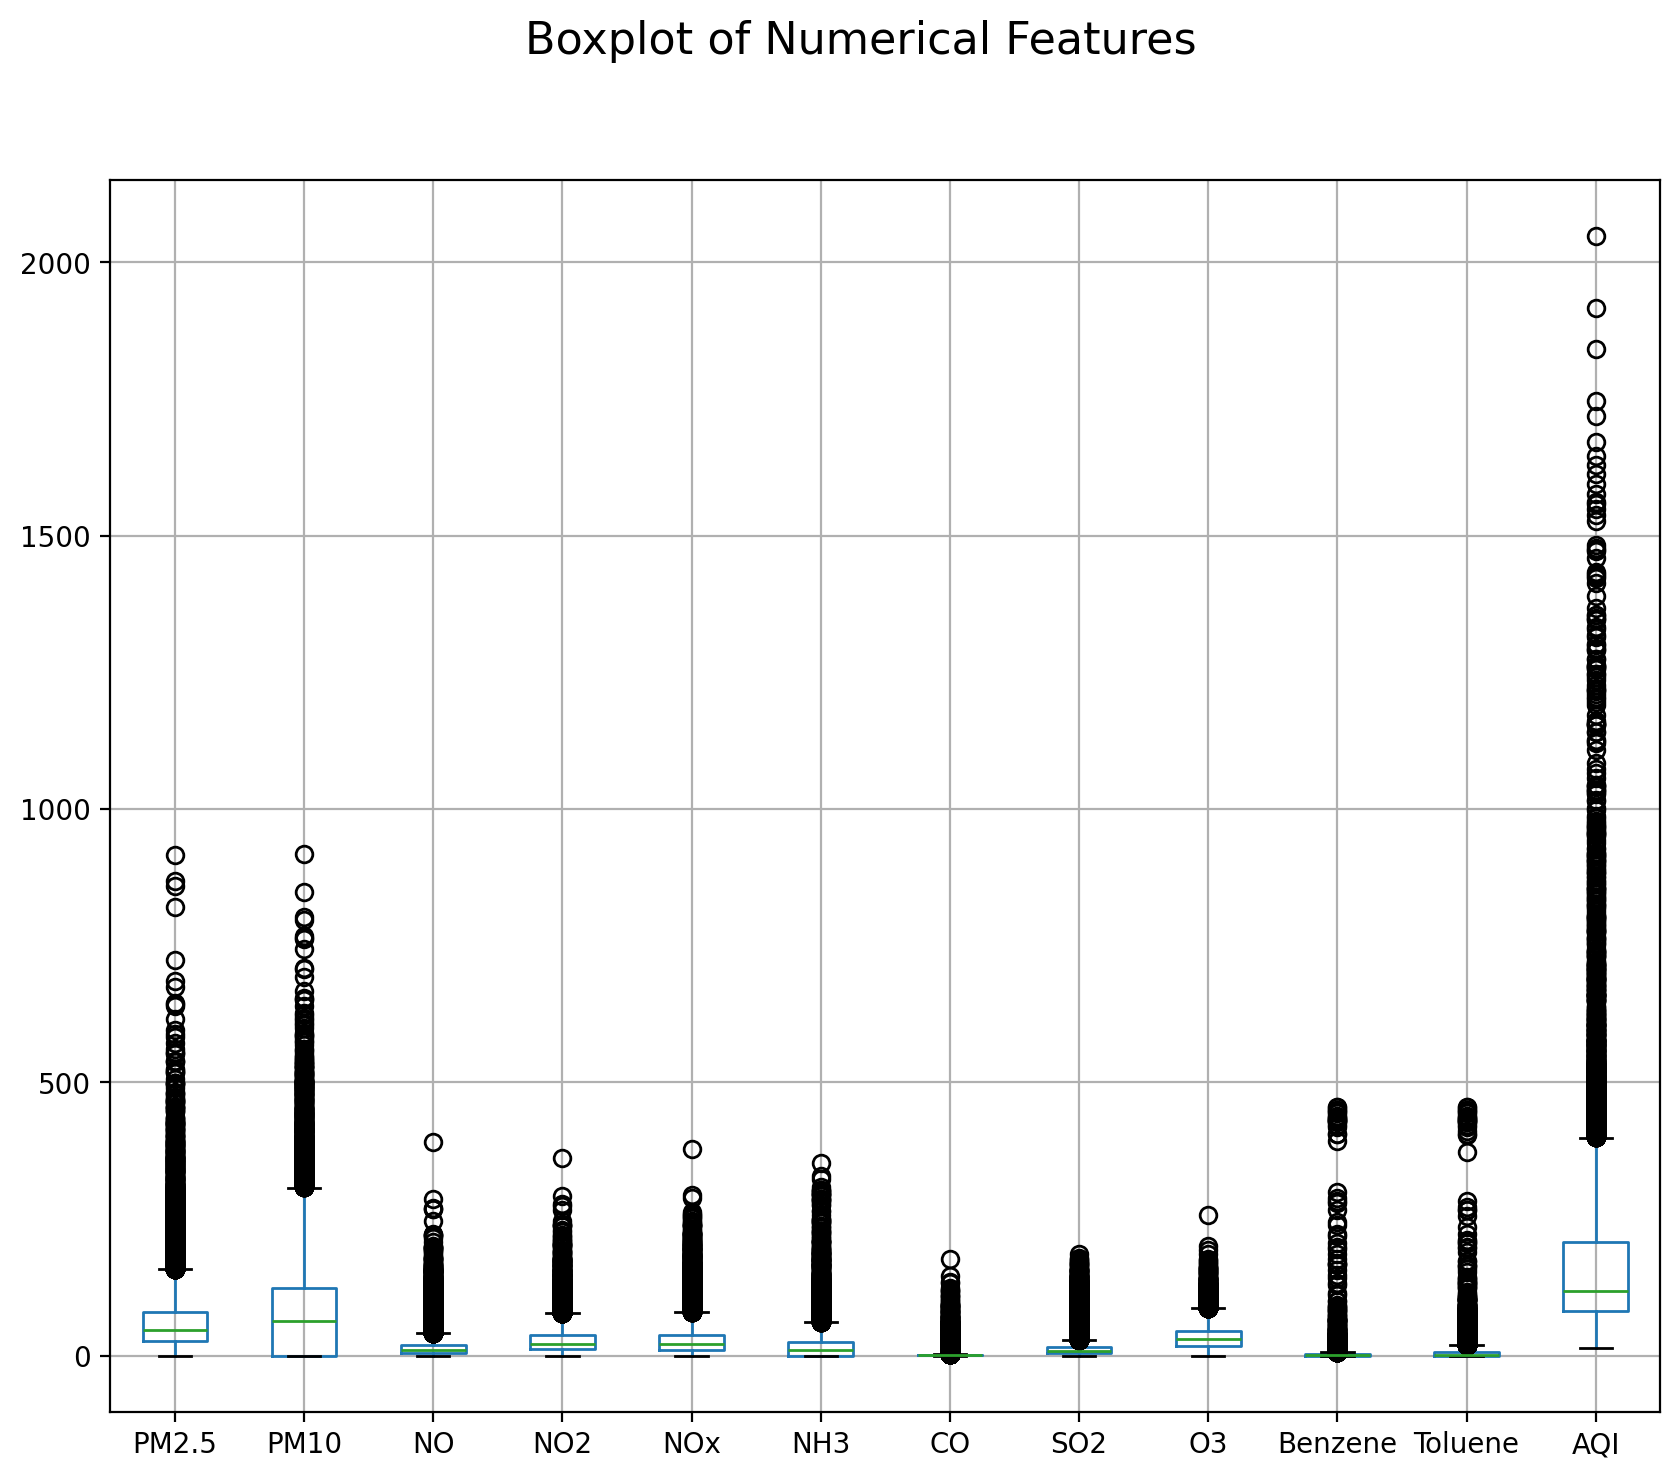

In [21]:
# Boxplot for each numerical feature
df.boxplot(figsize=(10, 8))
plt.suptitle("Boxplot of Numerical Features", fontsize=16)
plt.show()

In [22]:
df.AQI.mean()

166.4635814889336

In [23]:
df.AQI.median()

118.0

In [24]:
df.AQI.quantile(0.25) # To find out the 25th percentile
#quantile() is a function that will help to find the percentile of data points.

81.0

In [25]:
df.AQI.quantile(0.5) # To find out the median

118.0

In [26]:
df.AQI.quantile(0.75) # To find out the 75th percentile

208.0

 Outliers can also be detected using percentiles. So, let's check different percentiles.

In [27]:
df.AQI.quantile(0.80)

245.0

In [28]:
df.AQI.quantile(0.84)

288.0

In [29]:
df.AQI.quantile(0.85)

298.0

In [30]:
df[df.AQI>df.AQI.quantile(0.84)] #Data points that are greater than quantile point 84

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
29,Ahmedabad,79.84,0.00,13.85,28.68,41.08,0.00,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,914.0,Severe
33,Ahmedabad,139.70,0.00,30.61,28.40,56.73,0.00,30.61,33.79,73.60,0.17,0.03,660.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29003,Visakhapatnam,143.69,283.17,20.65,62.47,50.02,12.72,1.30,26.00,42.56,6.25,12.15,313.0,Very Poor
29004,Visakhapatnam,129.70,254.44,20.44,59.43,48.23,11.00,1.24,16.05,17.55,5.88,9.23,315.0,Very Poor
29005,Visakhapatnam,118.46,137.70,34.77,76.17,68.79,16.81,1.09,19.40,30.27,5.57,9.22,302.0,Very Poor
29290,Visakhapatnam,109.46,194.85,24.05,61.03,51.98,16.76,1.27,18.52,42.93,7.01,18.57,307.0,Very Poor


In [31]:
q1 = df.AQI.quantile(0.25)
q1

81.0

In [32]:
q3 = df.AQI.quantile(0.75)
q3

208.0

In [33]:
IQR = q3 - q1 #Inter Quartile Range
IQR

127.0

In [34]:
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
(lower,upper)

(-109.5, 398.5)

In [35]:
df[(df.AQI<-109.5)|(df.AQI>398.5)]

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
30,Ahmedabad,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,914.0,Severe
33,Ahmedabad,139.70,0.00,30.61,28.40,56.73,0.00,30.61,33.79,73.60,0.17,0.03,660.0,Severe
43,Ahmedabad,103.36,0.00,18.18,39.56,57.33,0.00,18.18,80.43,40.11,11.29,24.35,510.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26454,Talcher,68.38,336.82,35.57,0.00,29.15,7.66,2.52,16.17,7.50,0.00,0.00,425.0,Severe
26461,Talcher,116.52,768.16,27.89,0.00,24.94,7.23,4.20,16.71,3.71,0.00,0.00,437.0,Severe
26463,Talcher,71.07,369.02,32.85,0.00,27.66,7.52,2.96,6.63,8.00,0.00,0.00,437.0,Severe
26719,Talcher,48.32,512.41,41.82,1.21,41.62,8.49,2.11,36.43,13.67,0.00,0.00,401.0,Severe


In [37]:
#dataset without outlier
newdf =df[(df.AQI<-109.5)|(df.AQI>398.5)]
newdf

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
30,Ahmedabad,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,914.0,Severe
33,Ahmedabad,139.70,0.00,30.61,28.40,56.73,0.00,30.61,33.79,73.60,0.17,0.03,660.0,Severe
43,Ahmedabad,103.36,0.00,18.18,39.56,57.33,0.00,18.18,80.43,40.11,11.29,24.35,510.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26454,Talcher,68.38,336.82,35.57,0.00,29.15,7.66,2.52,16.17,7.50,0.00,0.00,425.0,Severe
26461,Talcher,116.52,768.16,27.89,0.00,24.94,7.23,4.20,16.71,3.71,0.00,0.00,437.0,Severe
26463,Talcher,71.07,369.02,32.85,0.00,27.66,7.52,2.96,6.63,8.00,0.00,0.00,437.0,Severe
26719,Talcher,48.32,512.41,41.82,1.21,41.62,8.49,2.11,36.43,13.67,0.00,0.00,401.0,Severe


   - Address skewed data in numerical features through transformations.

In [38]:
#seaborn displot to represent the overall distribution of continuos data variable(variations in the data distribution)
sns.displot(newdf["AQI"],color = 'r')

In [39]:
newdf['AQI'].skew()

2.584514412241365

In [40]:
newdf['log_AQI'] = np.log(newdf["AQI"])
newdf['log_AQI']

30       6.242223
31       6.661855
32       6.817831
33       6.492240
43       6.234411
           ...   
26454    6.052089
26461    6.079933
26463    6.079933
26719    5.993961
26720    6.246107
Name: log_AQI, Length: 1358, dtype: float64

In [41]:
sns.displot(newdf['log_AQI'],color = 'b')

In [42]:
newdf['log_AQI'].skew()

1.7322952594241405

# 6.EXPLORATORY DATA ANALYSIS

- Gain insights into the data distribution, relationships, and potential patterns.
- Visualizations: Histogram, Boxplot, Pair Plot, Heatmap Correlation, Pie Diagram, Bar Plot, Count Plot, Line Plot, Kernel Density Estimation (KDE).


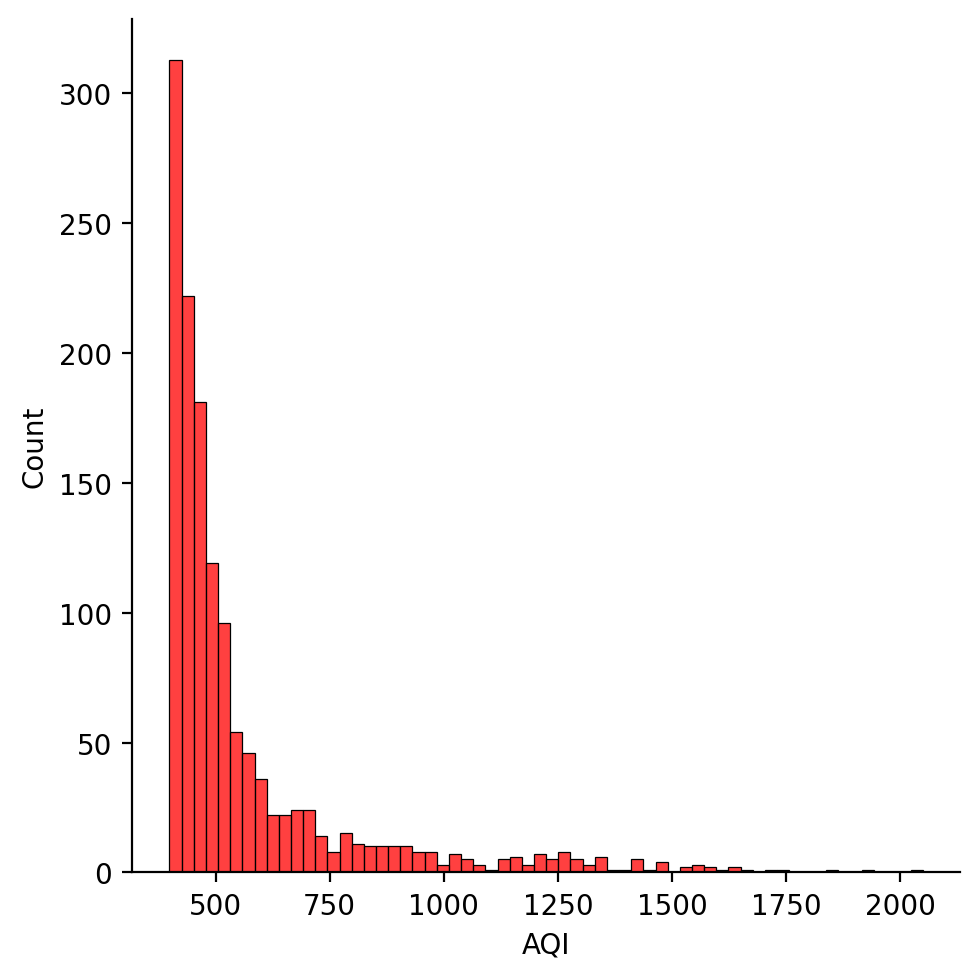

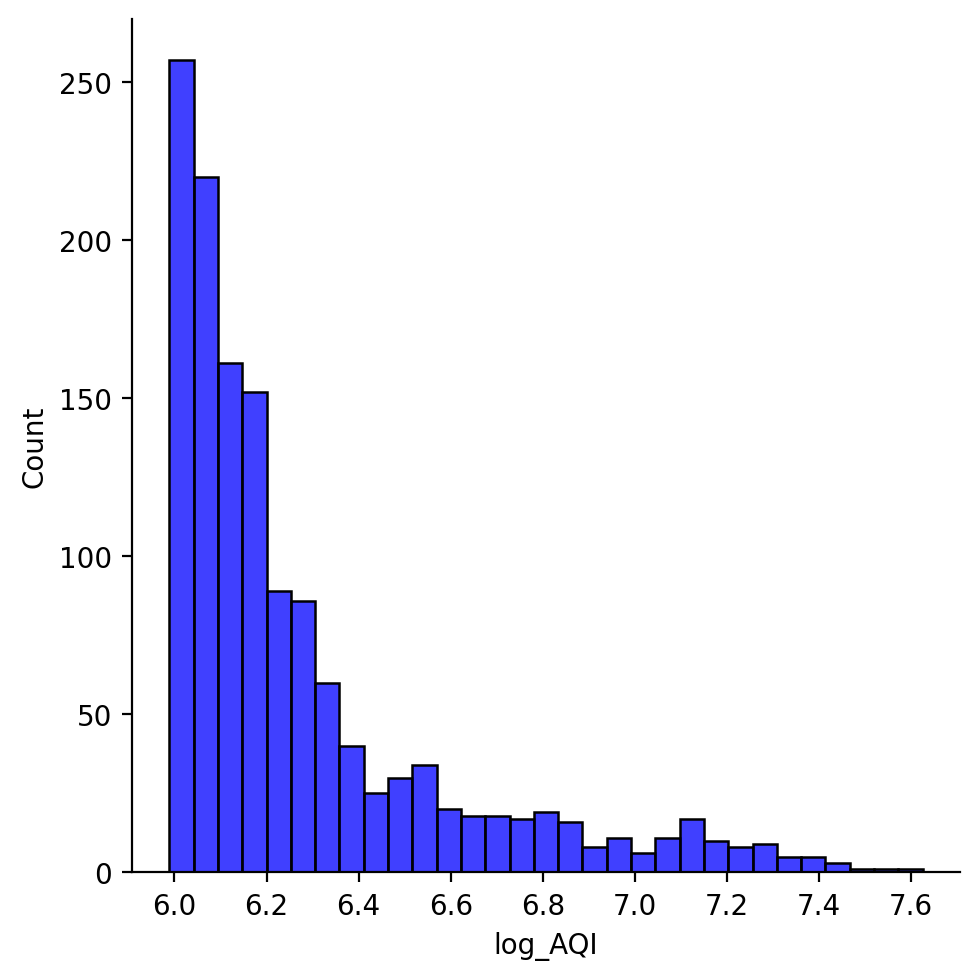

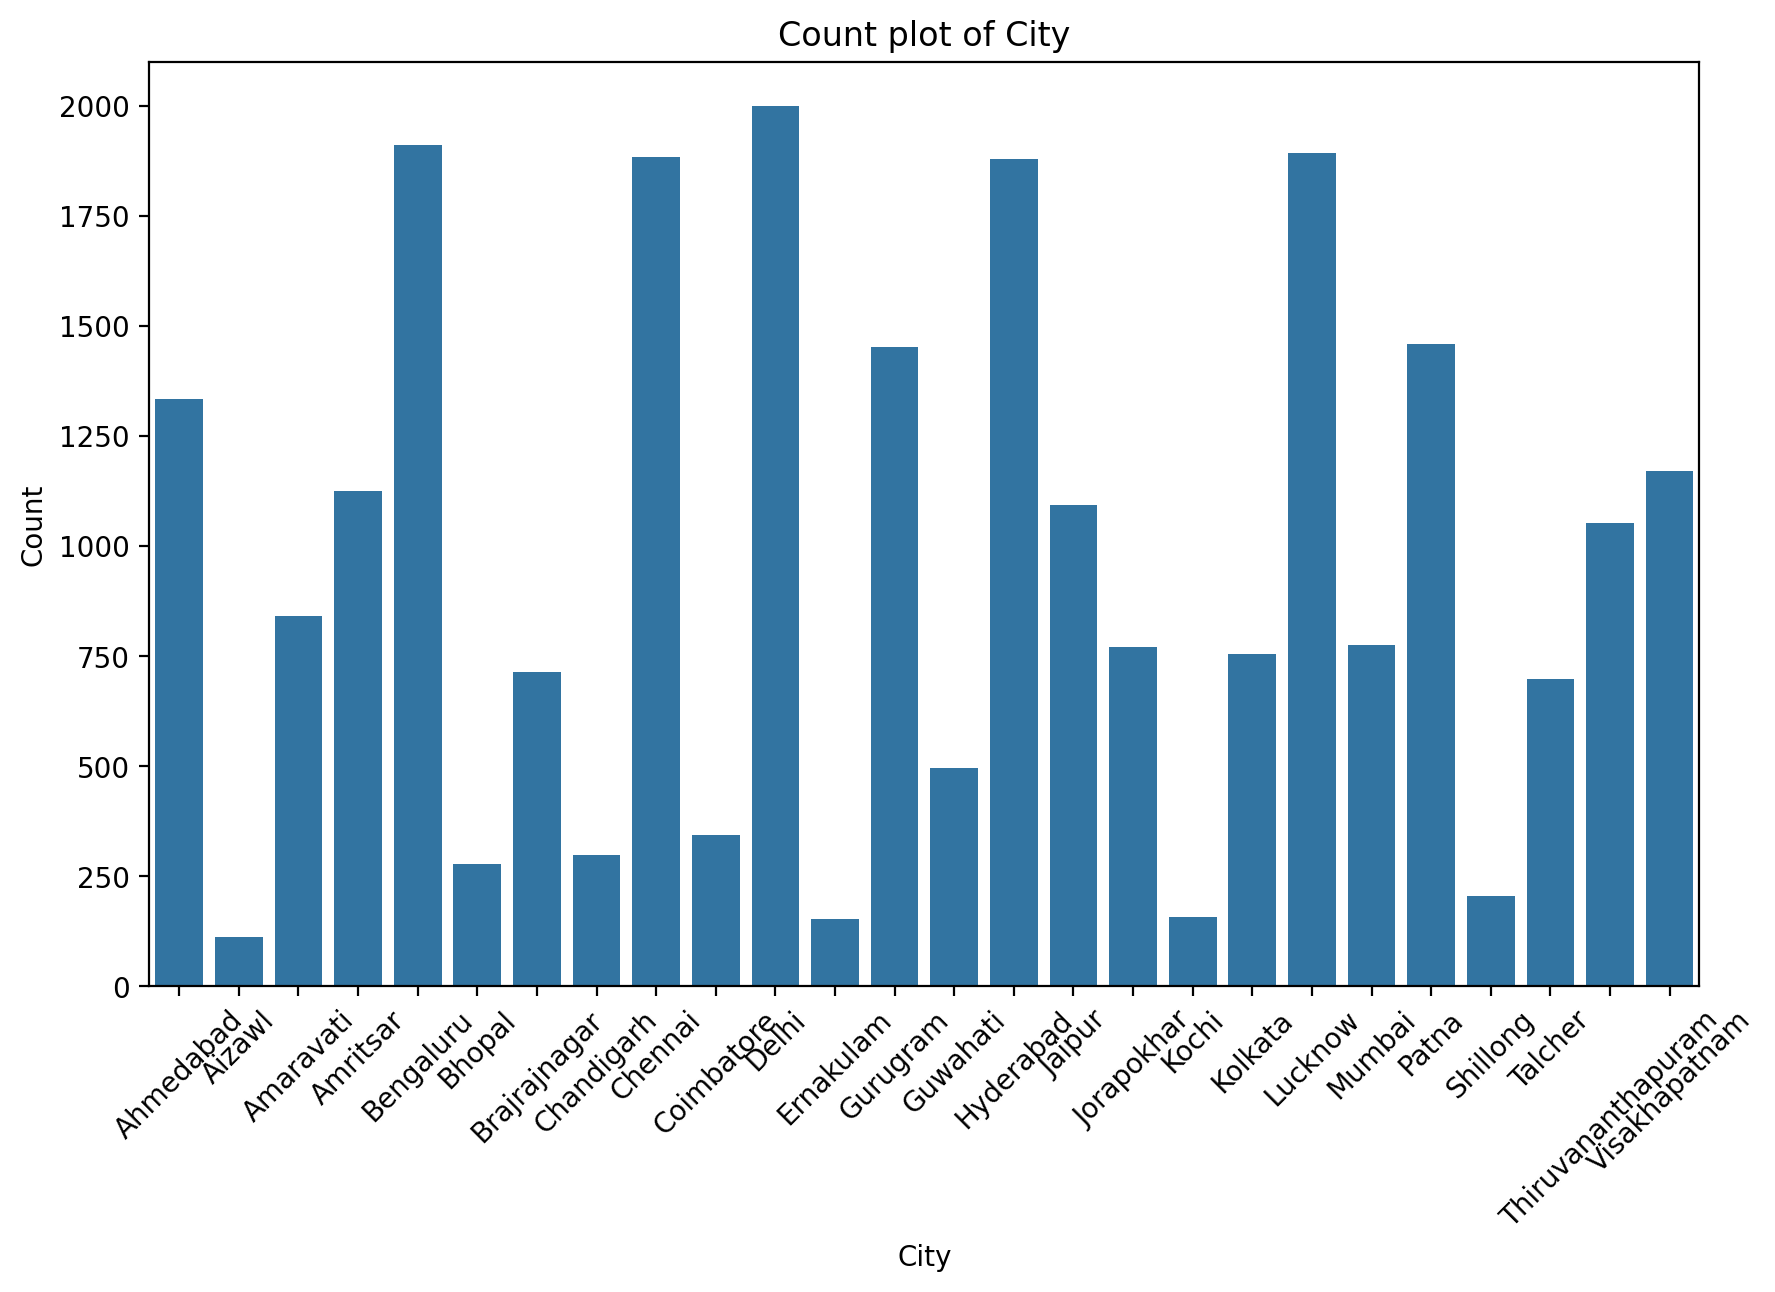

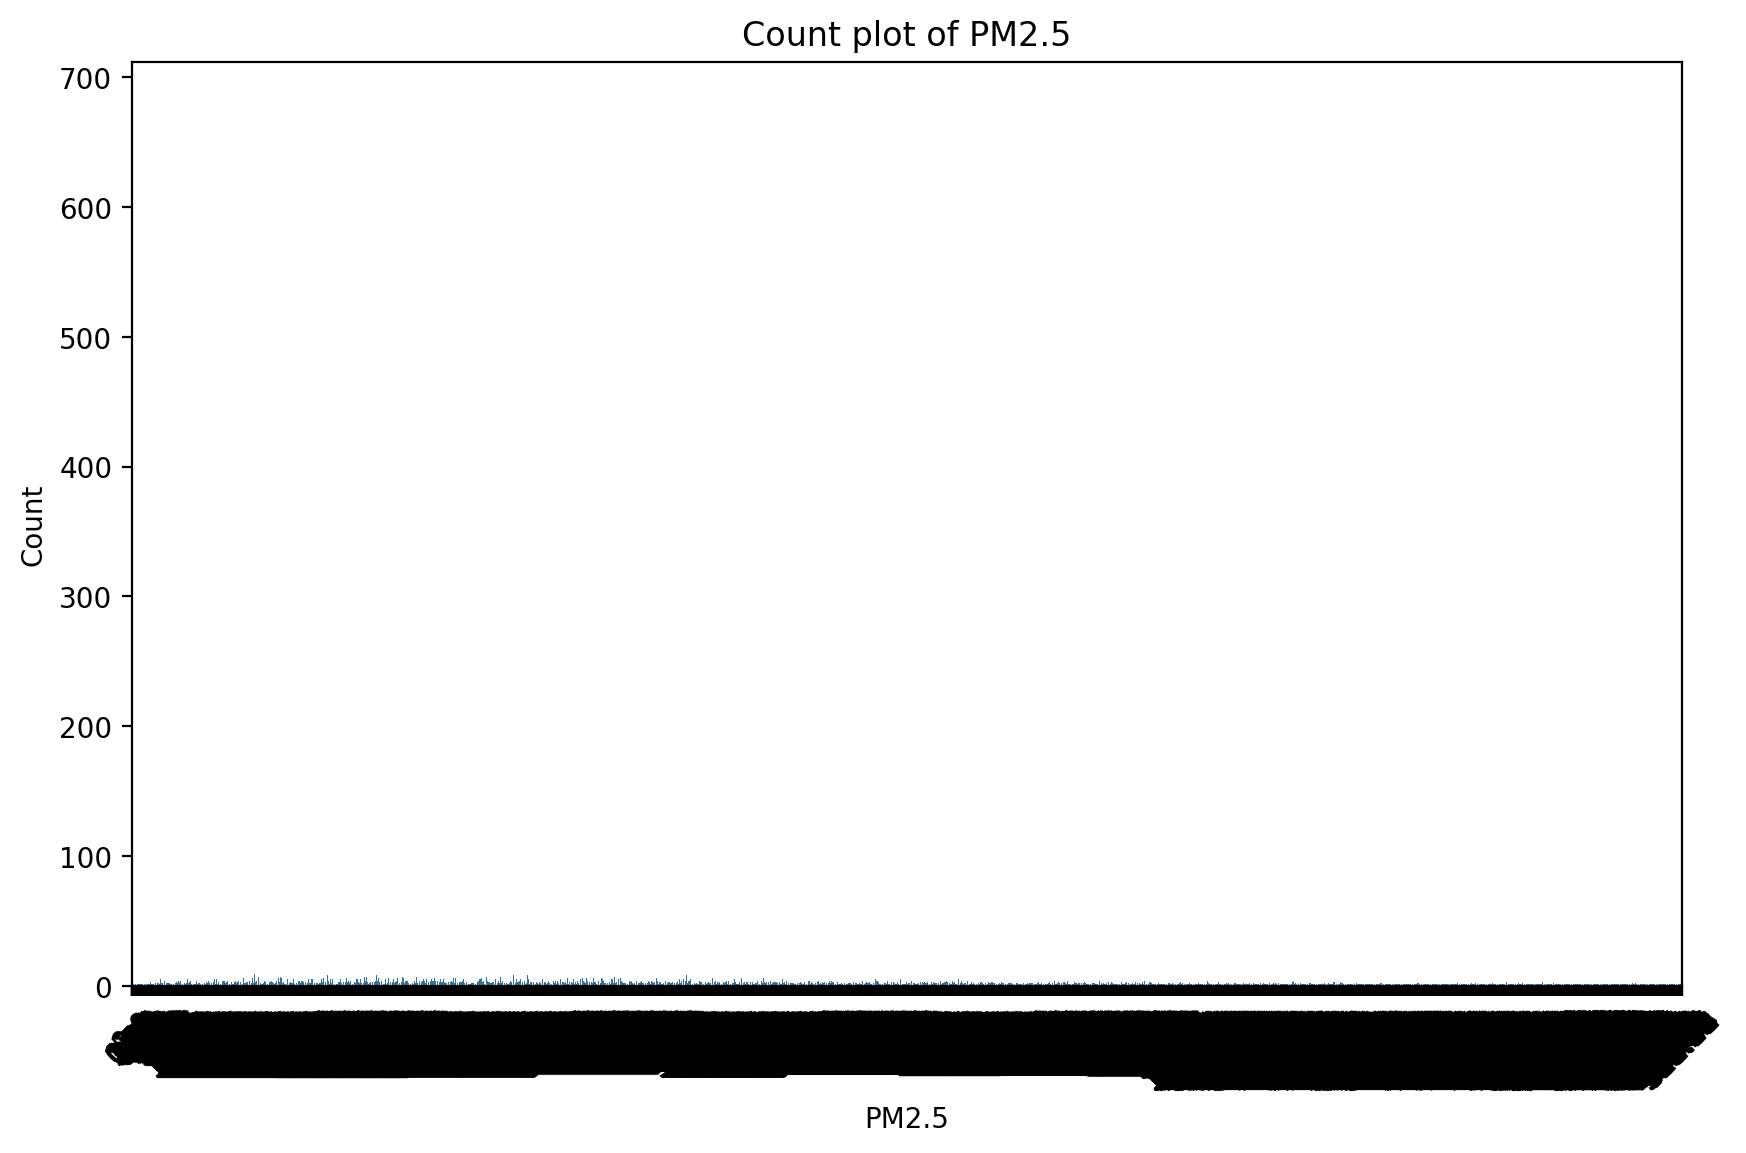

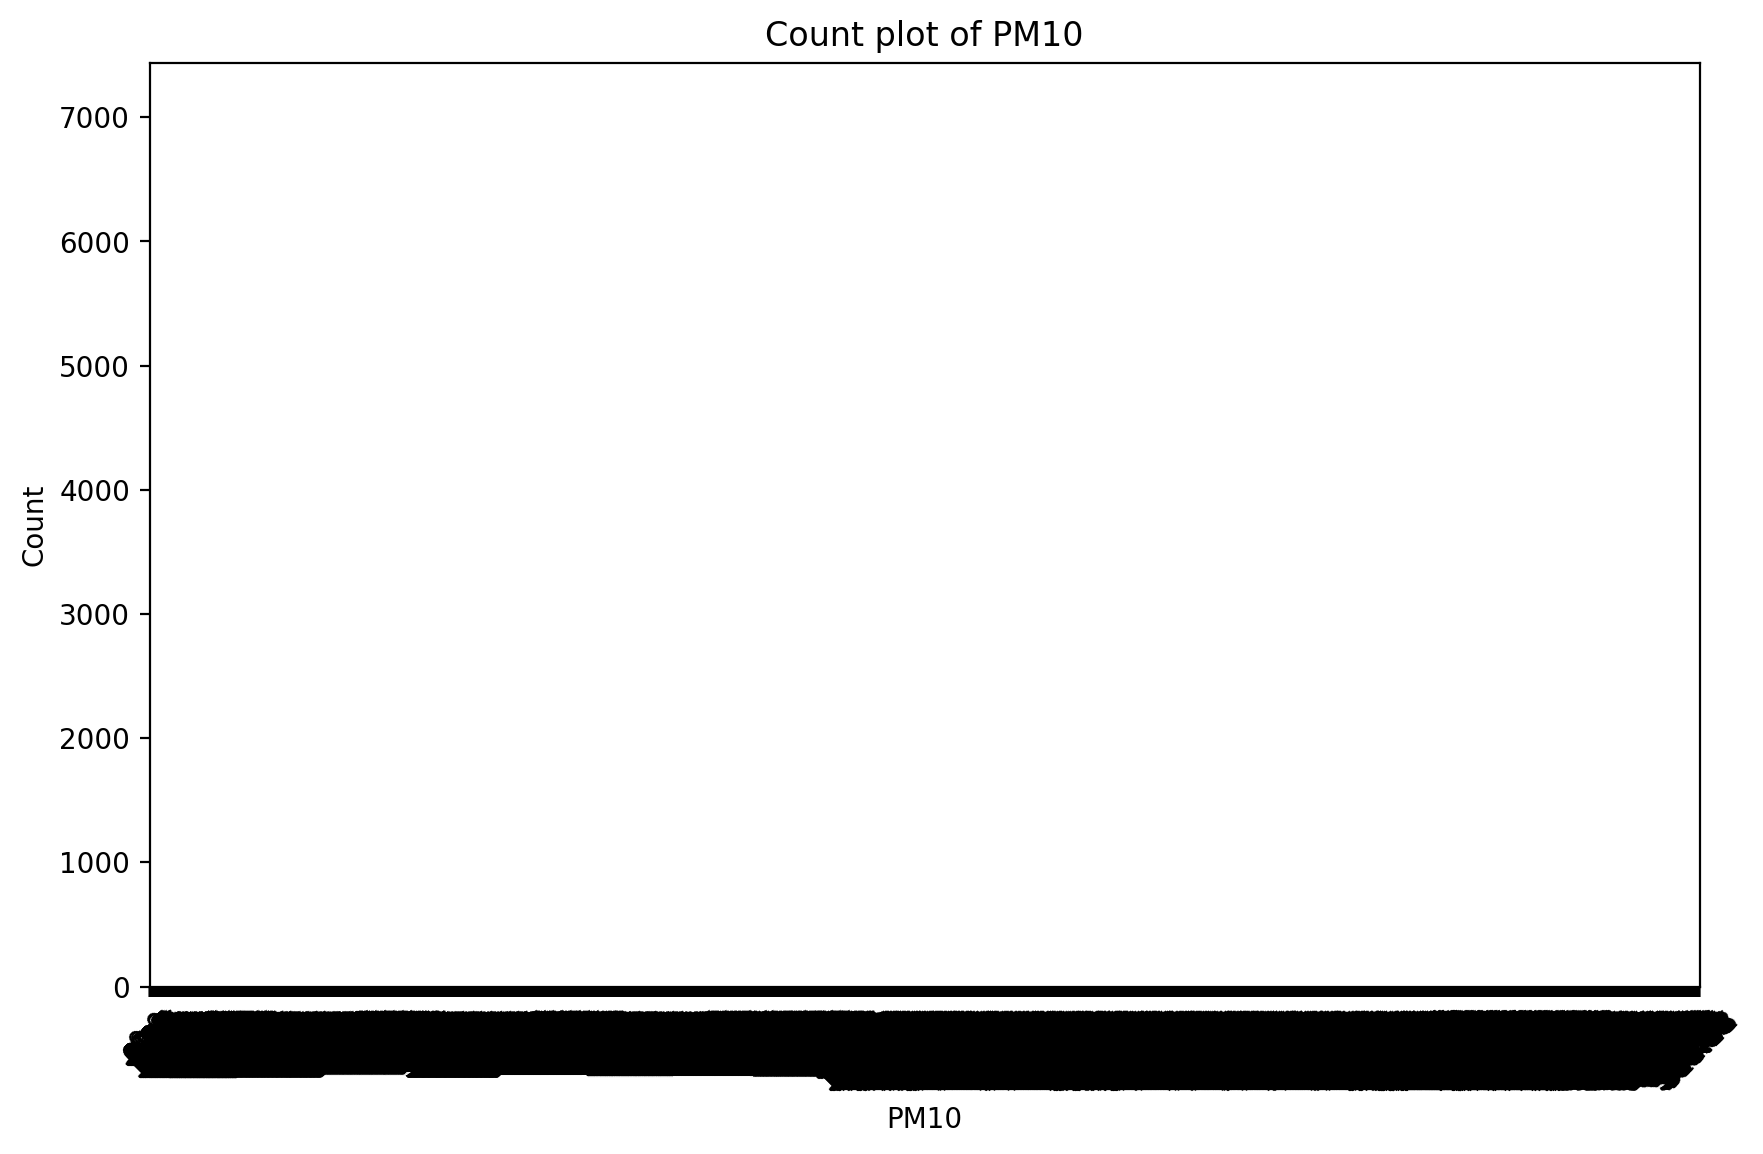

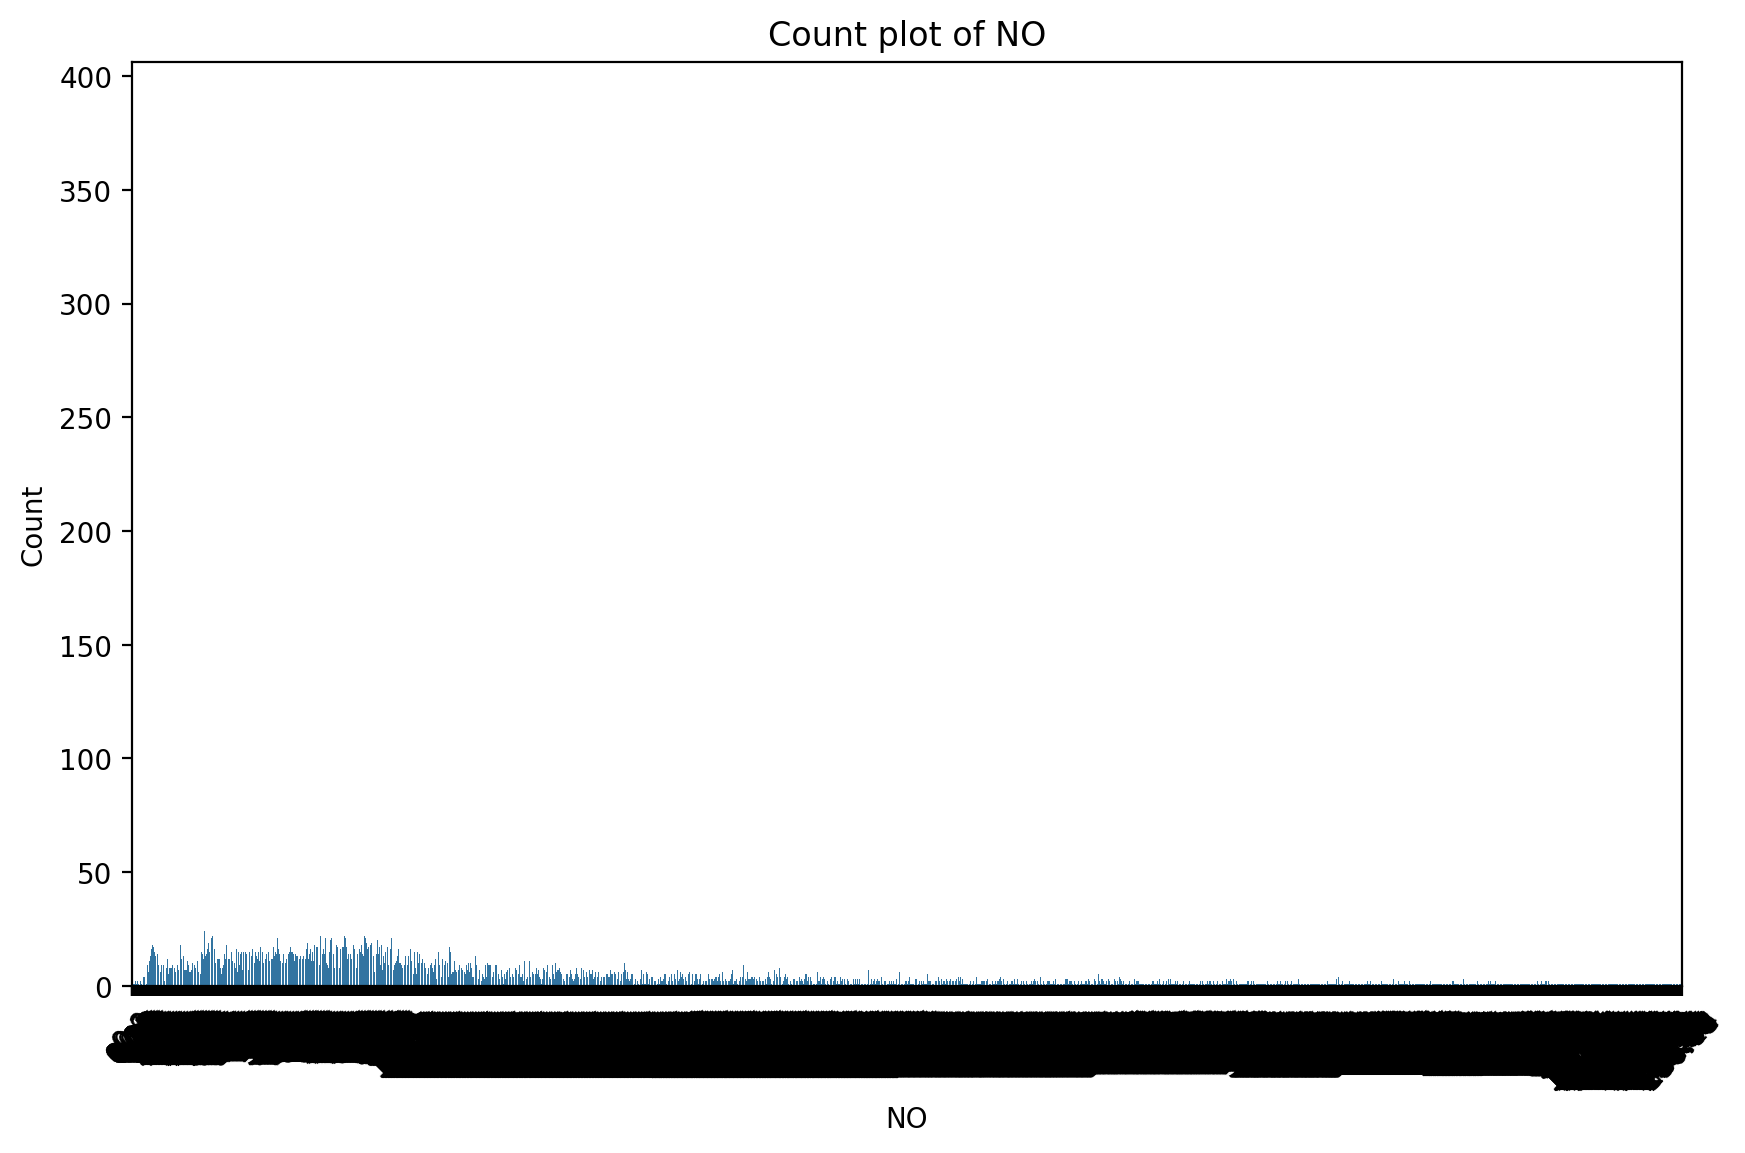

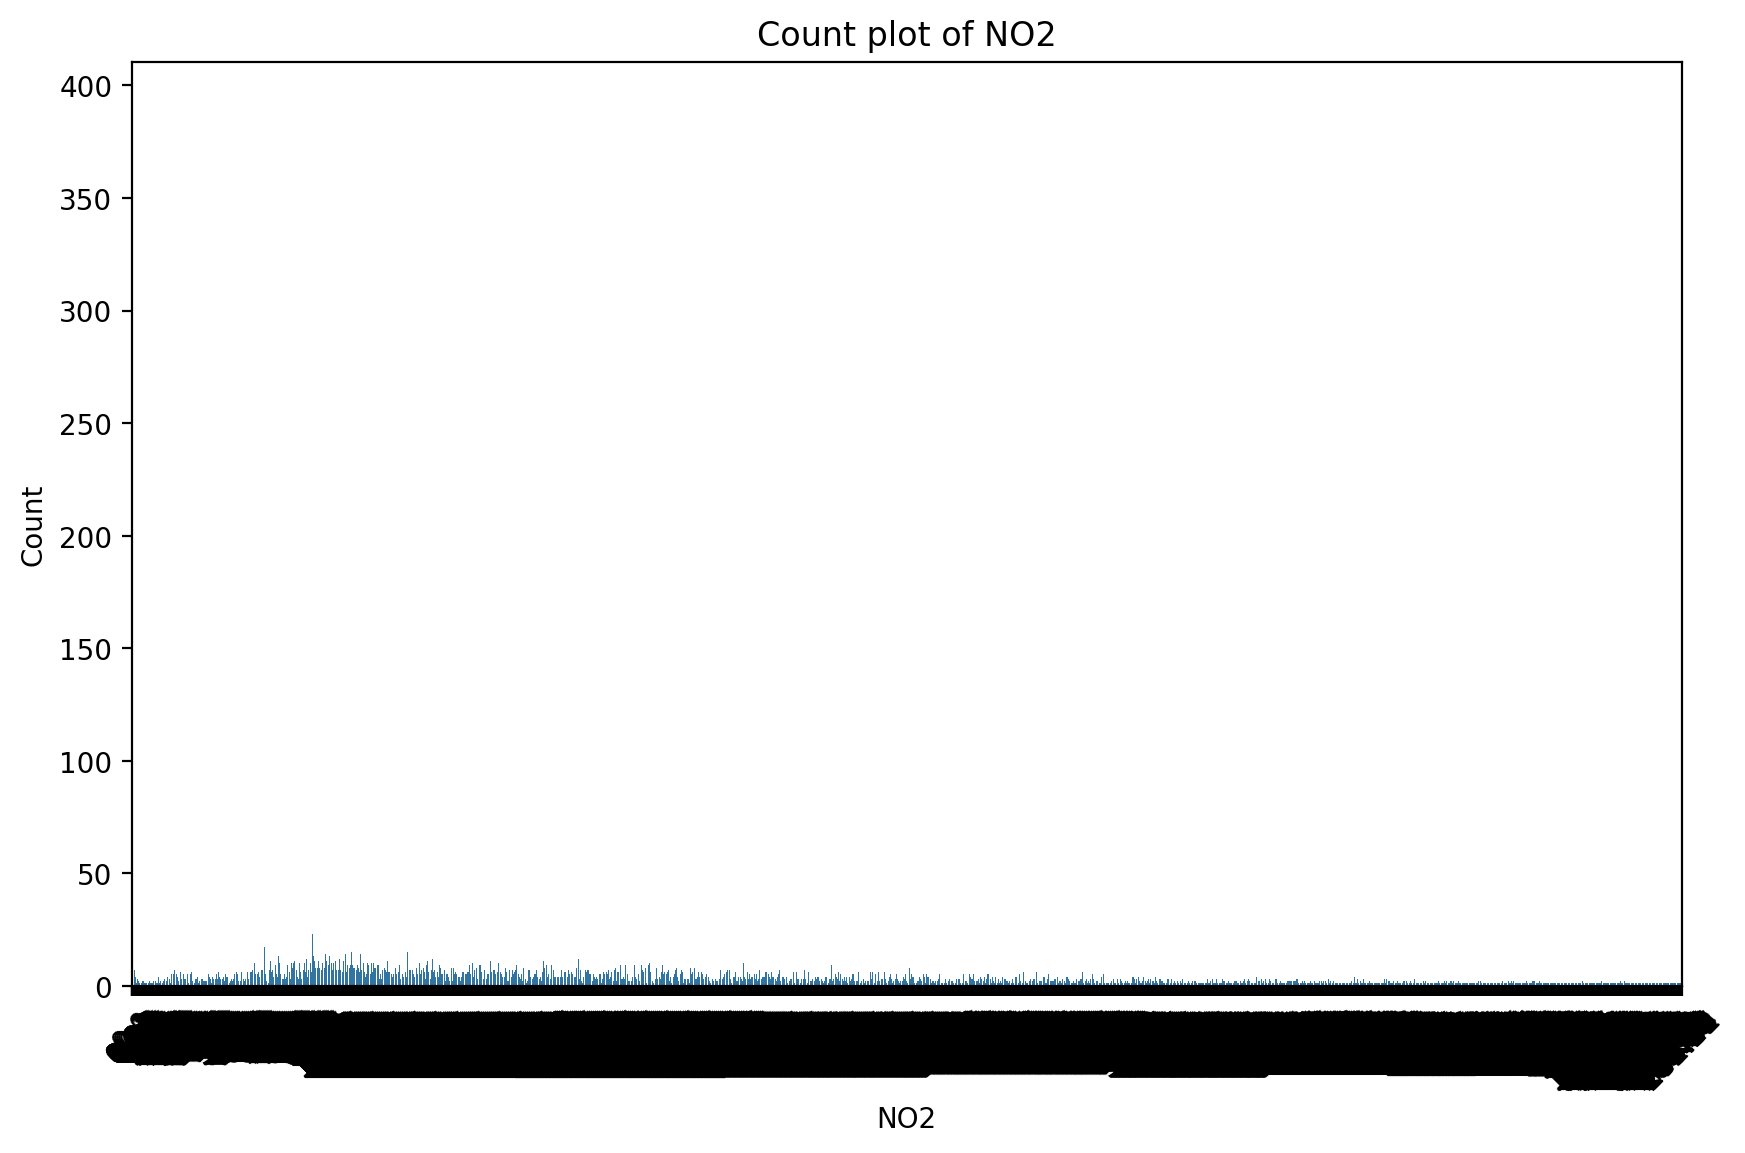

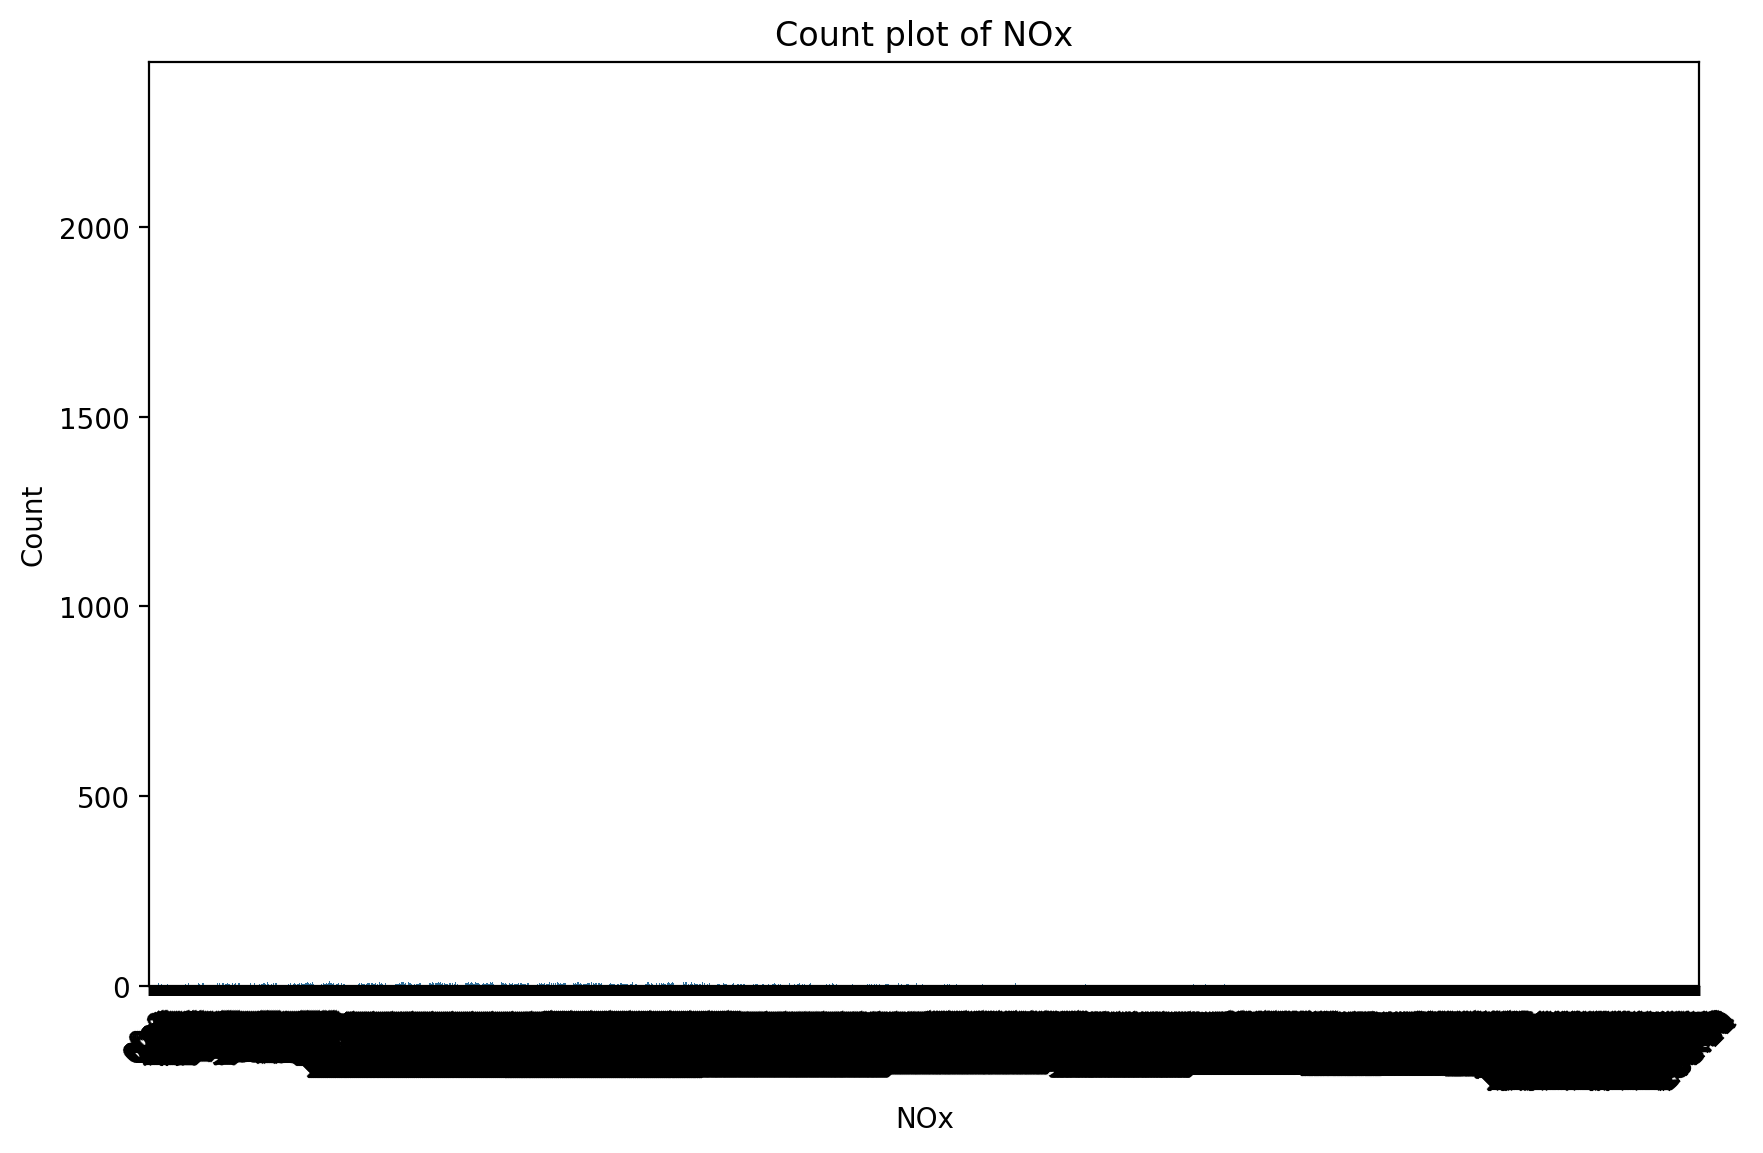

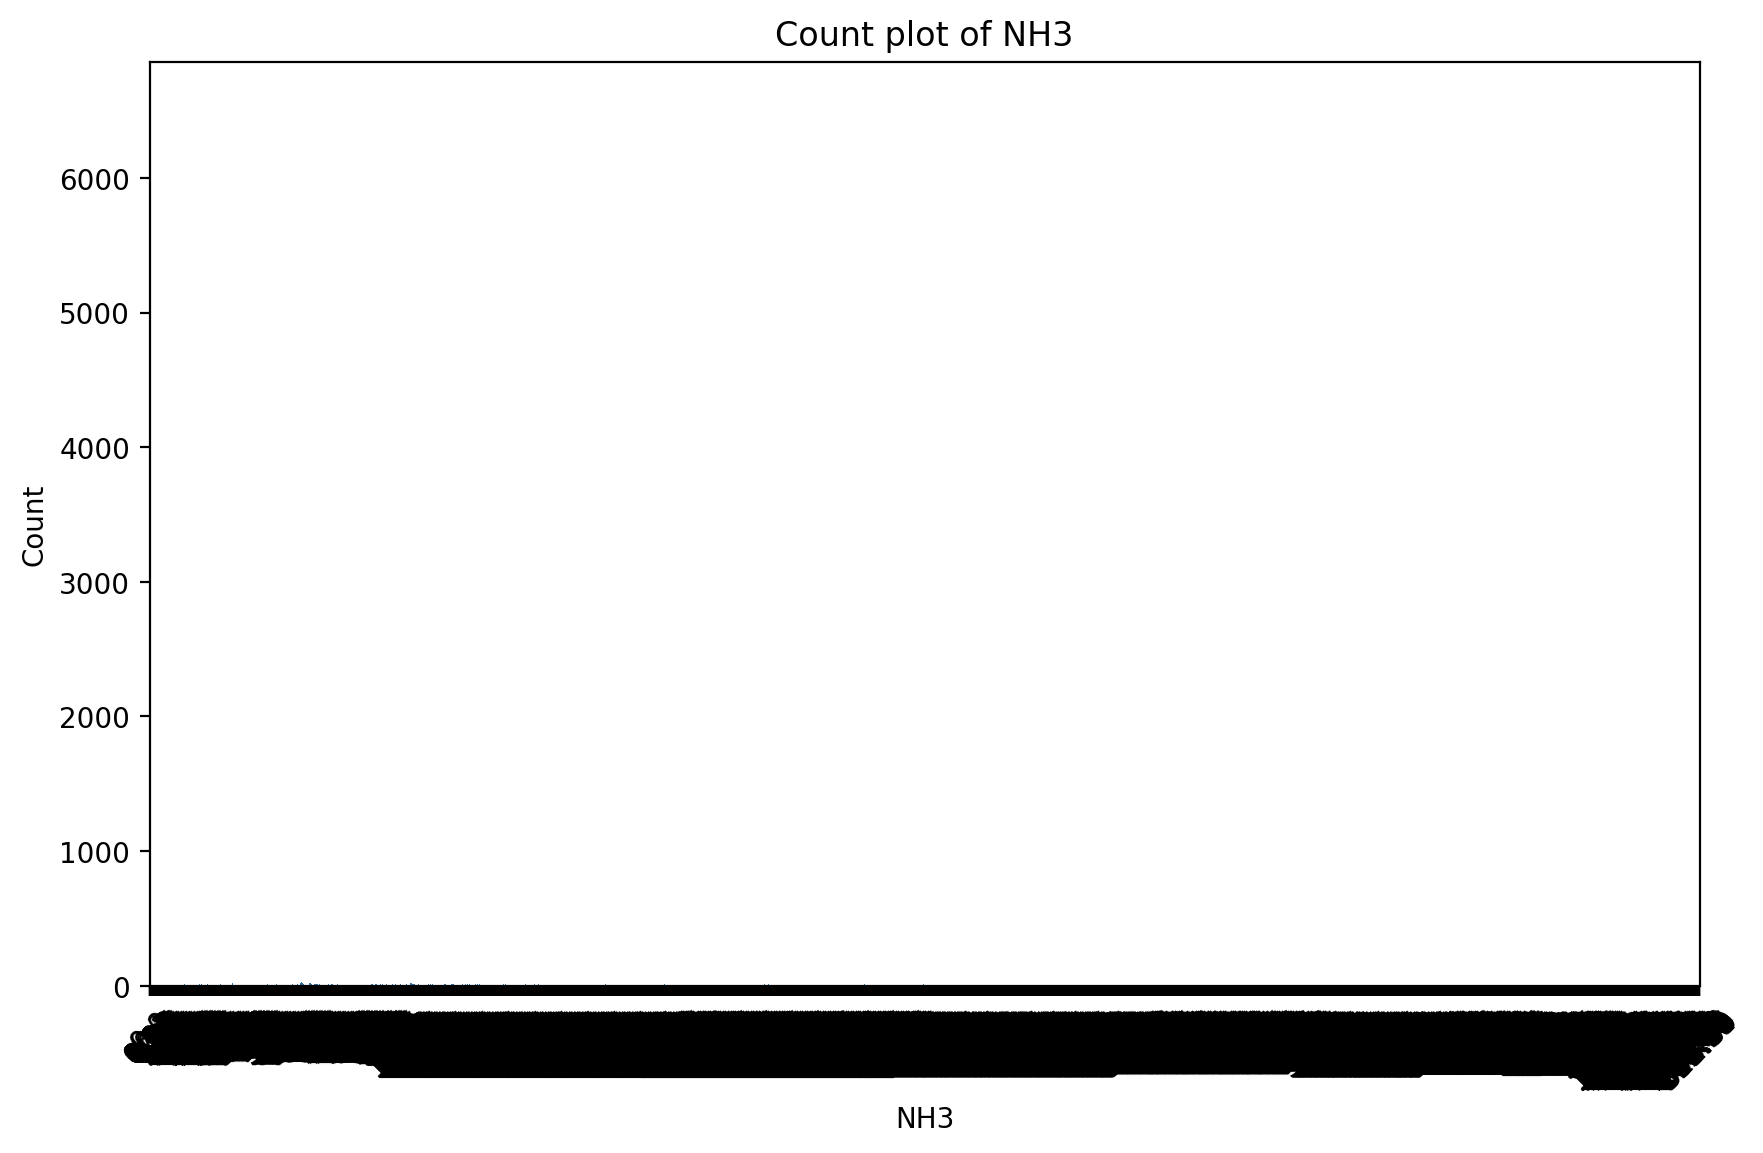

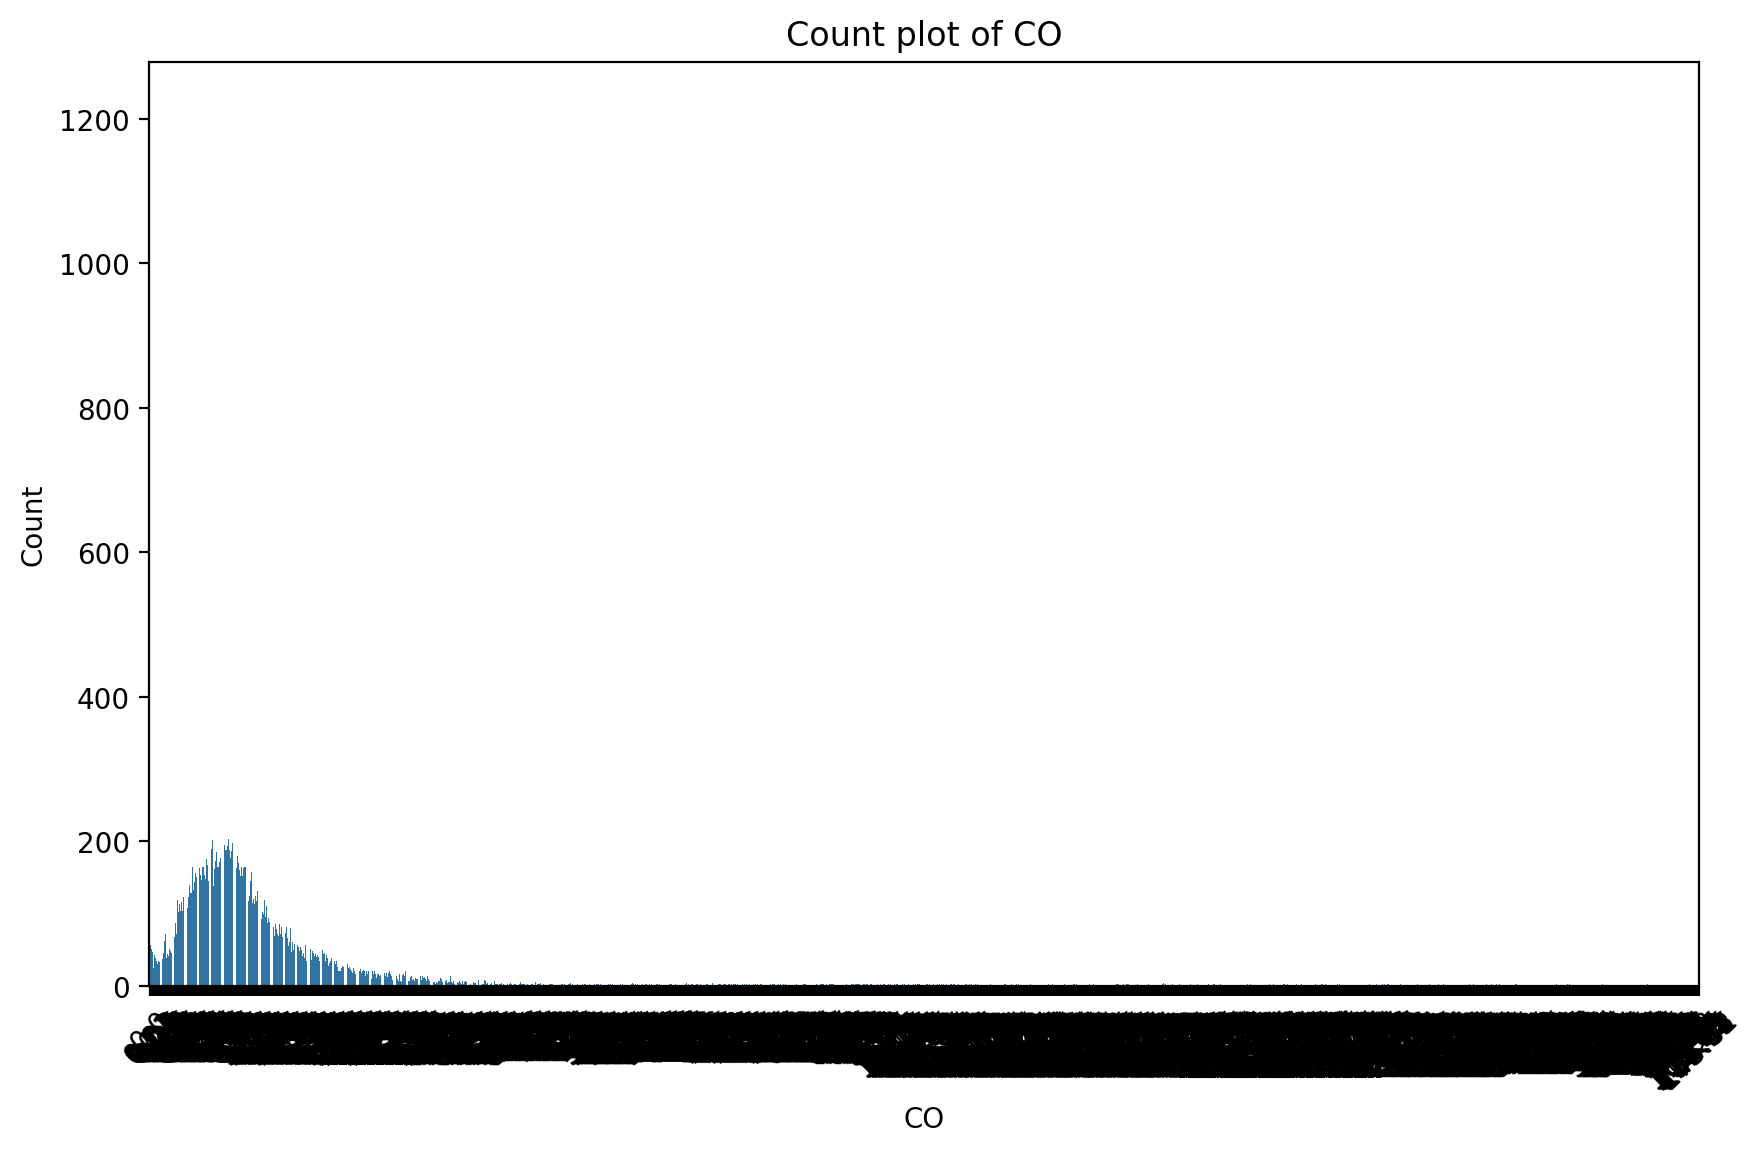

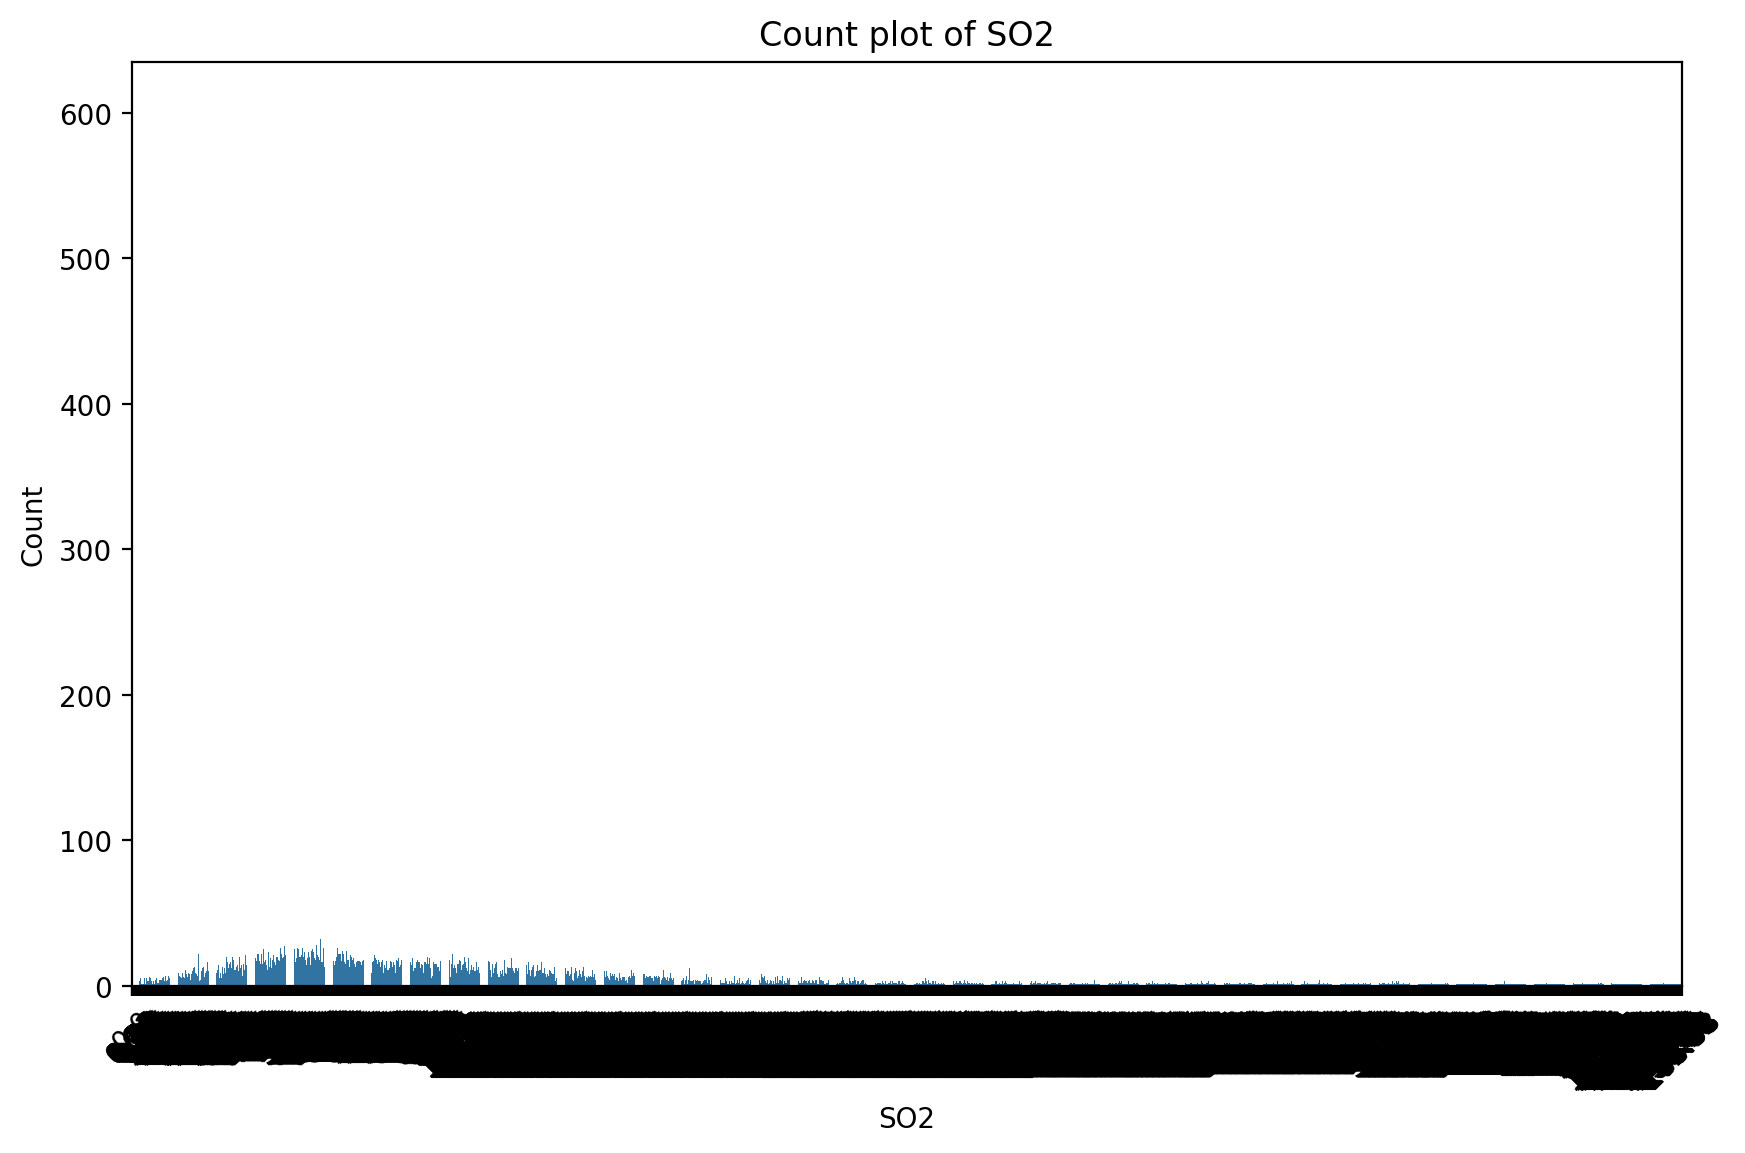

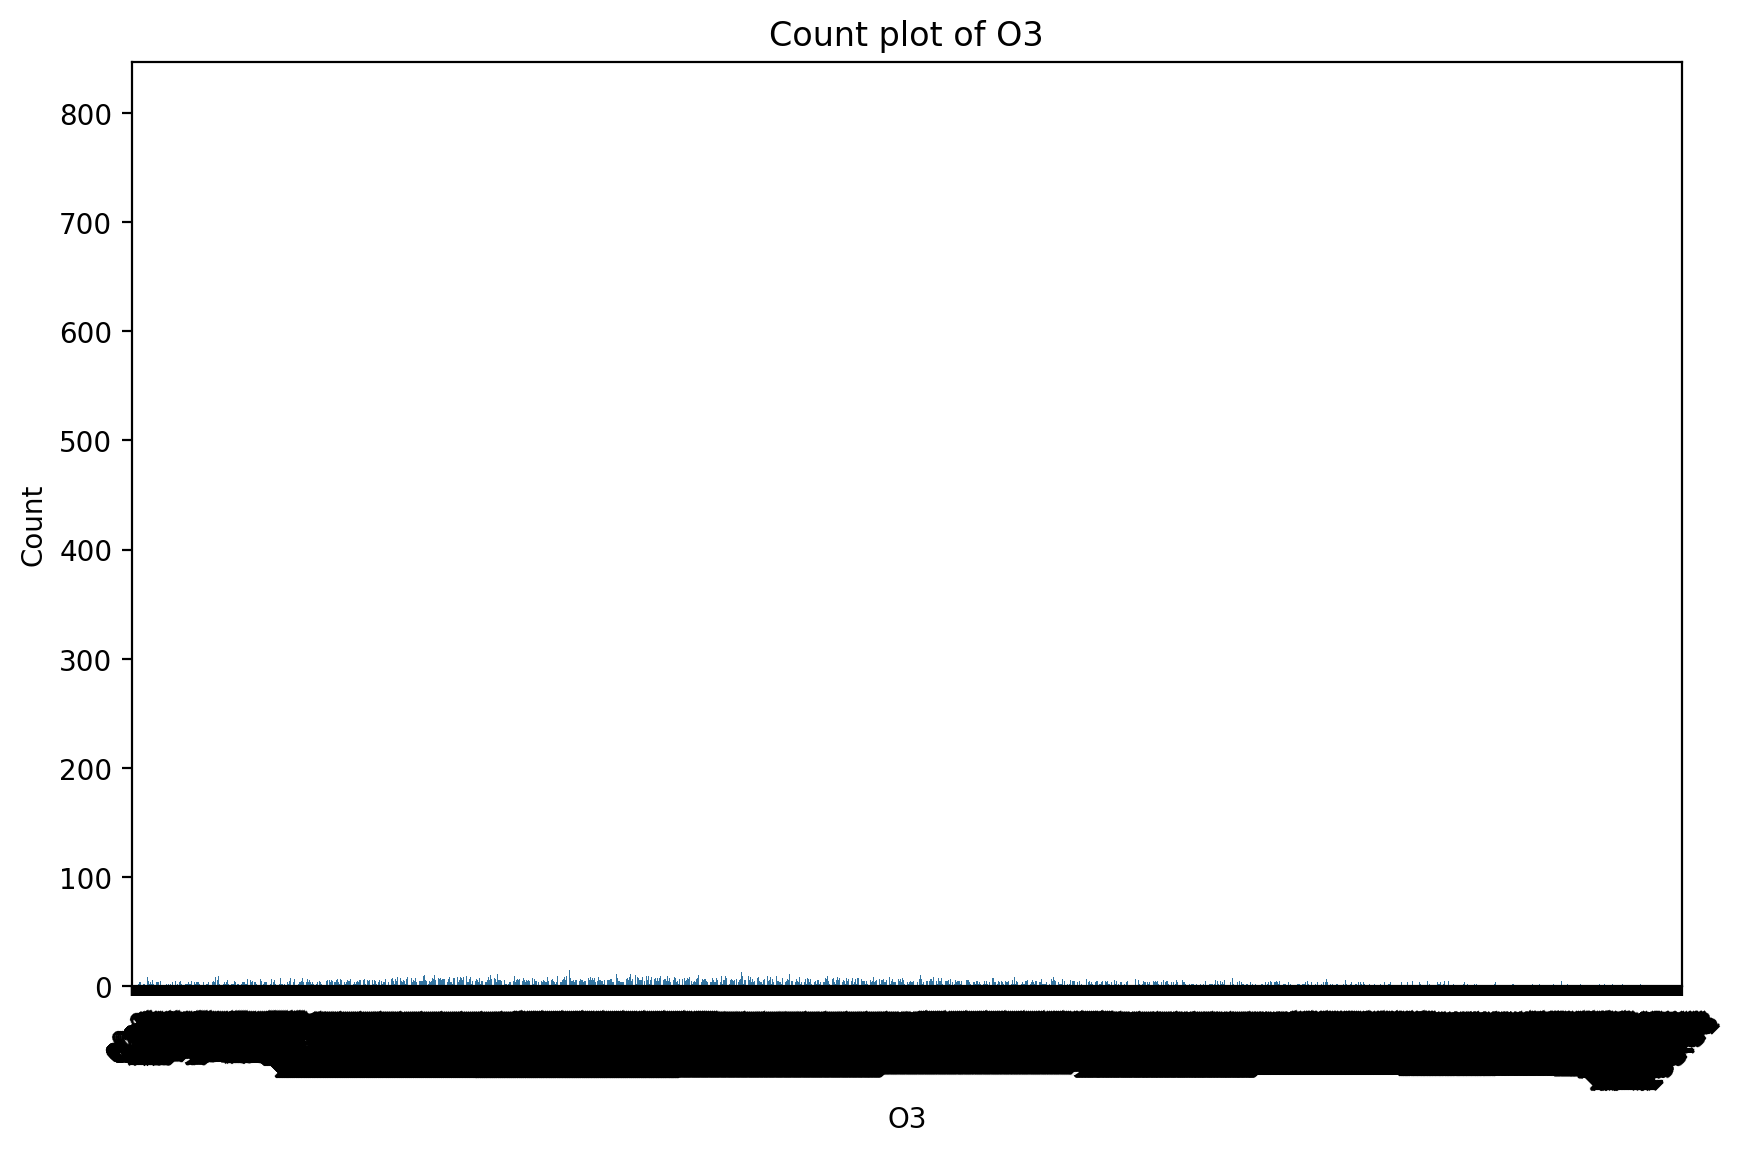

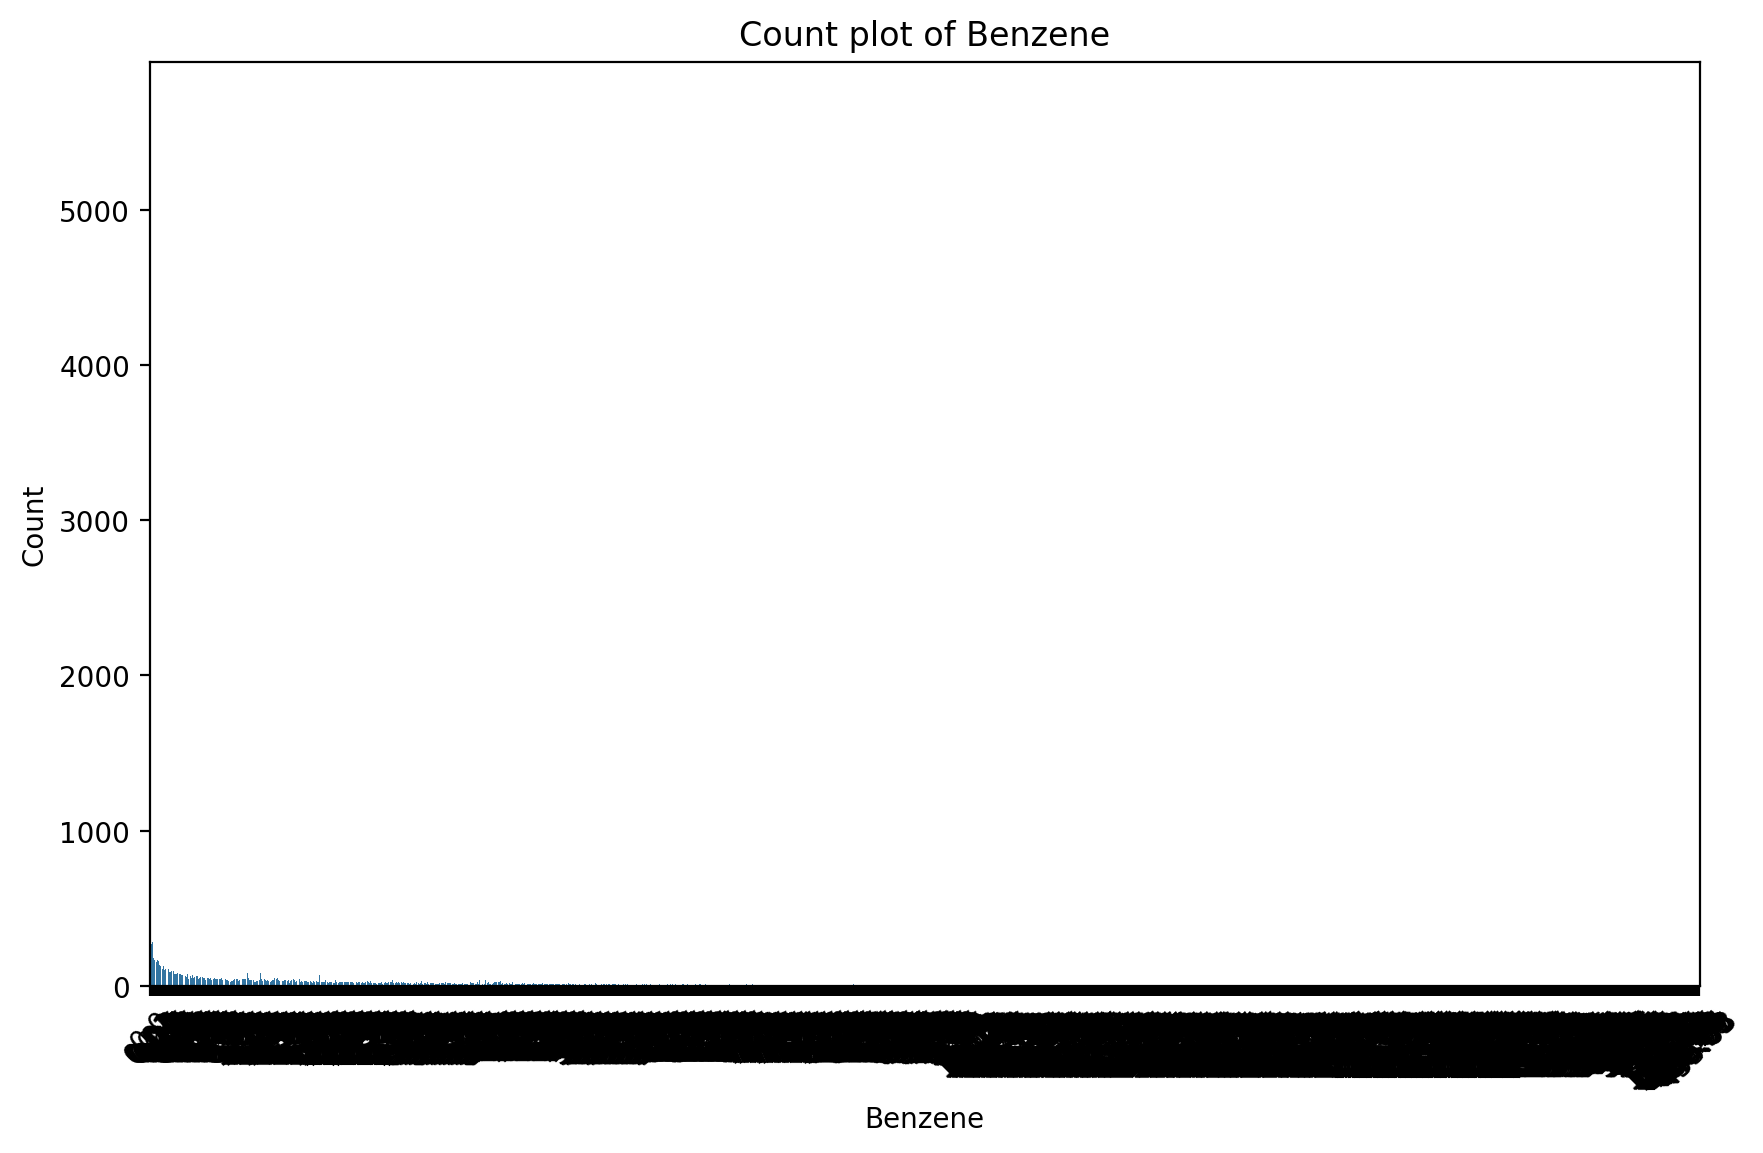

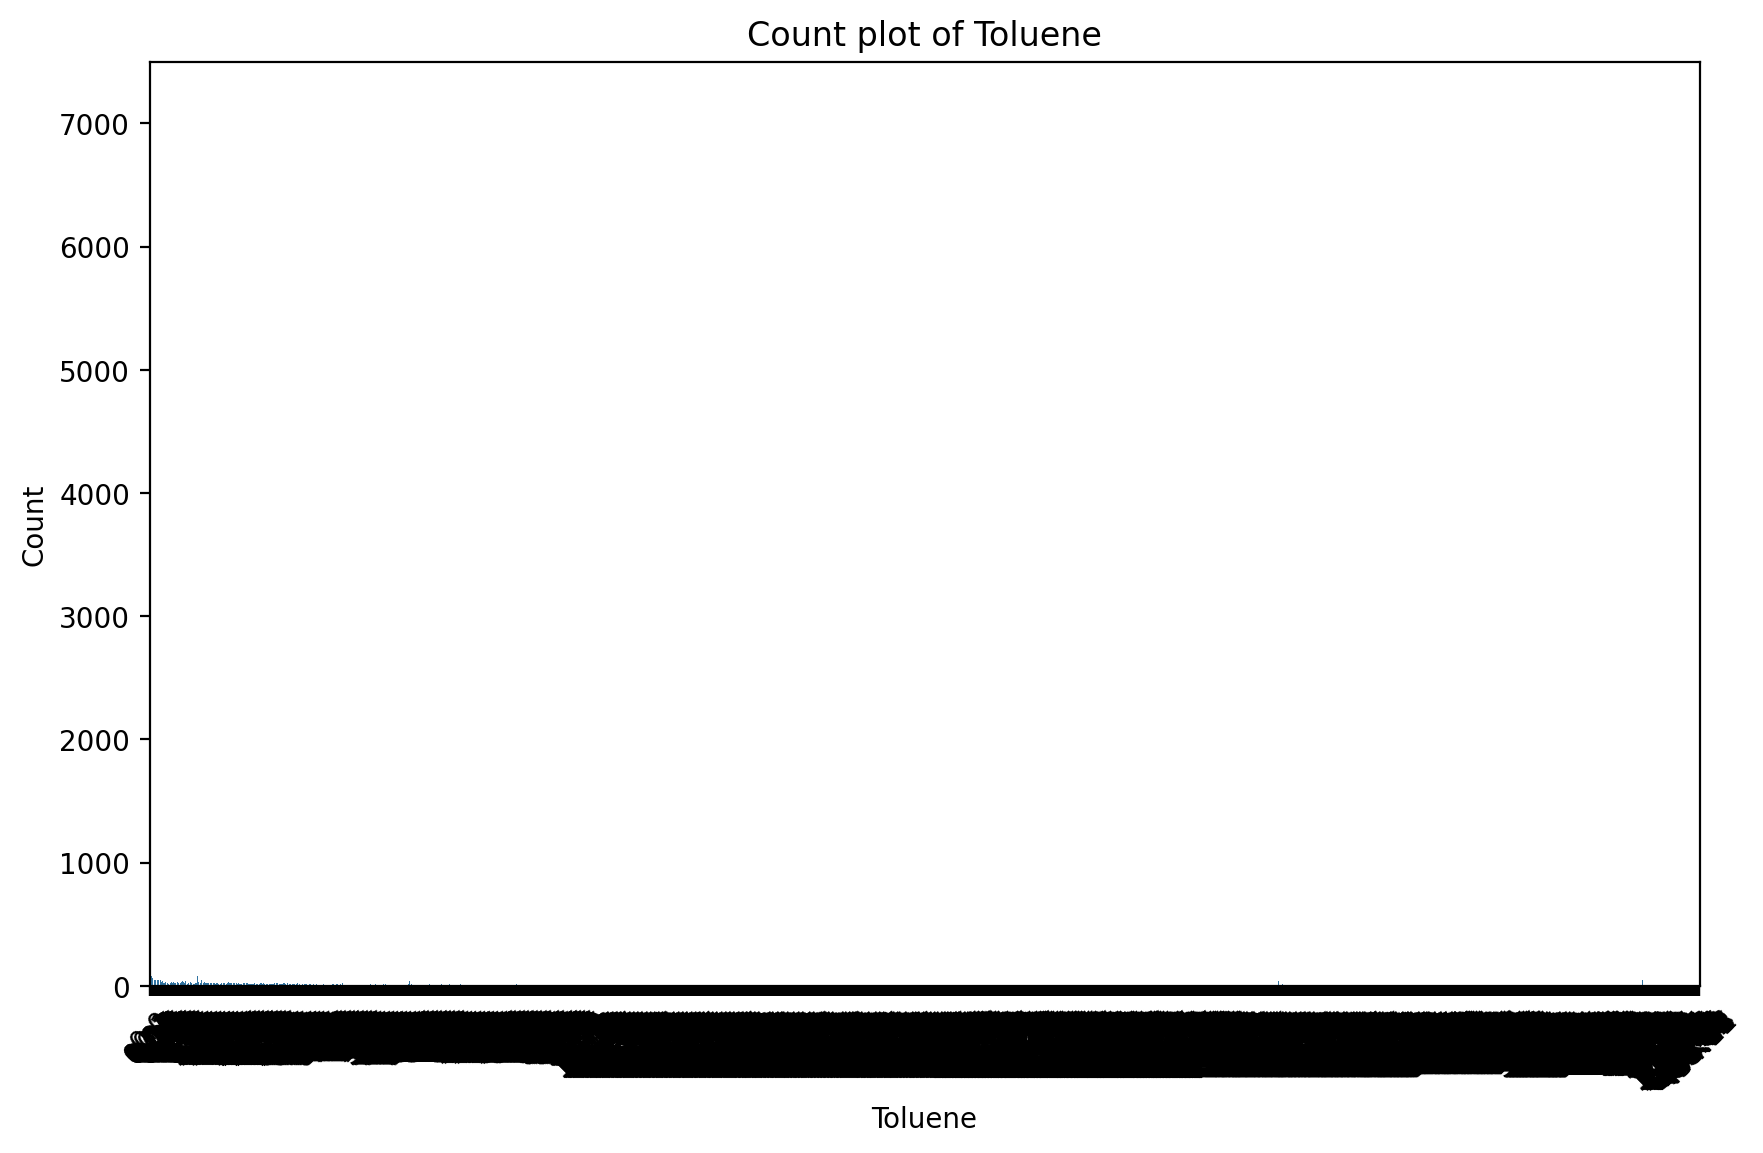

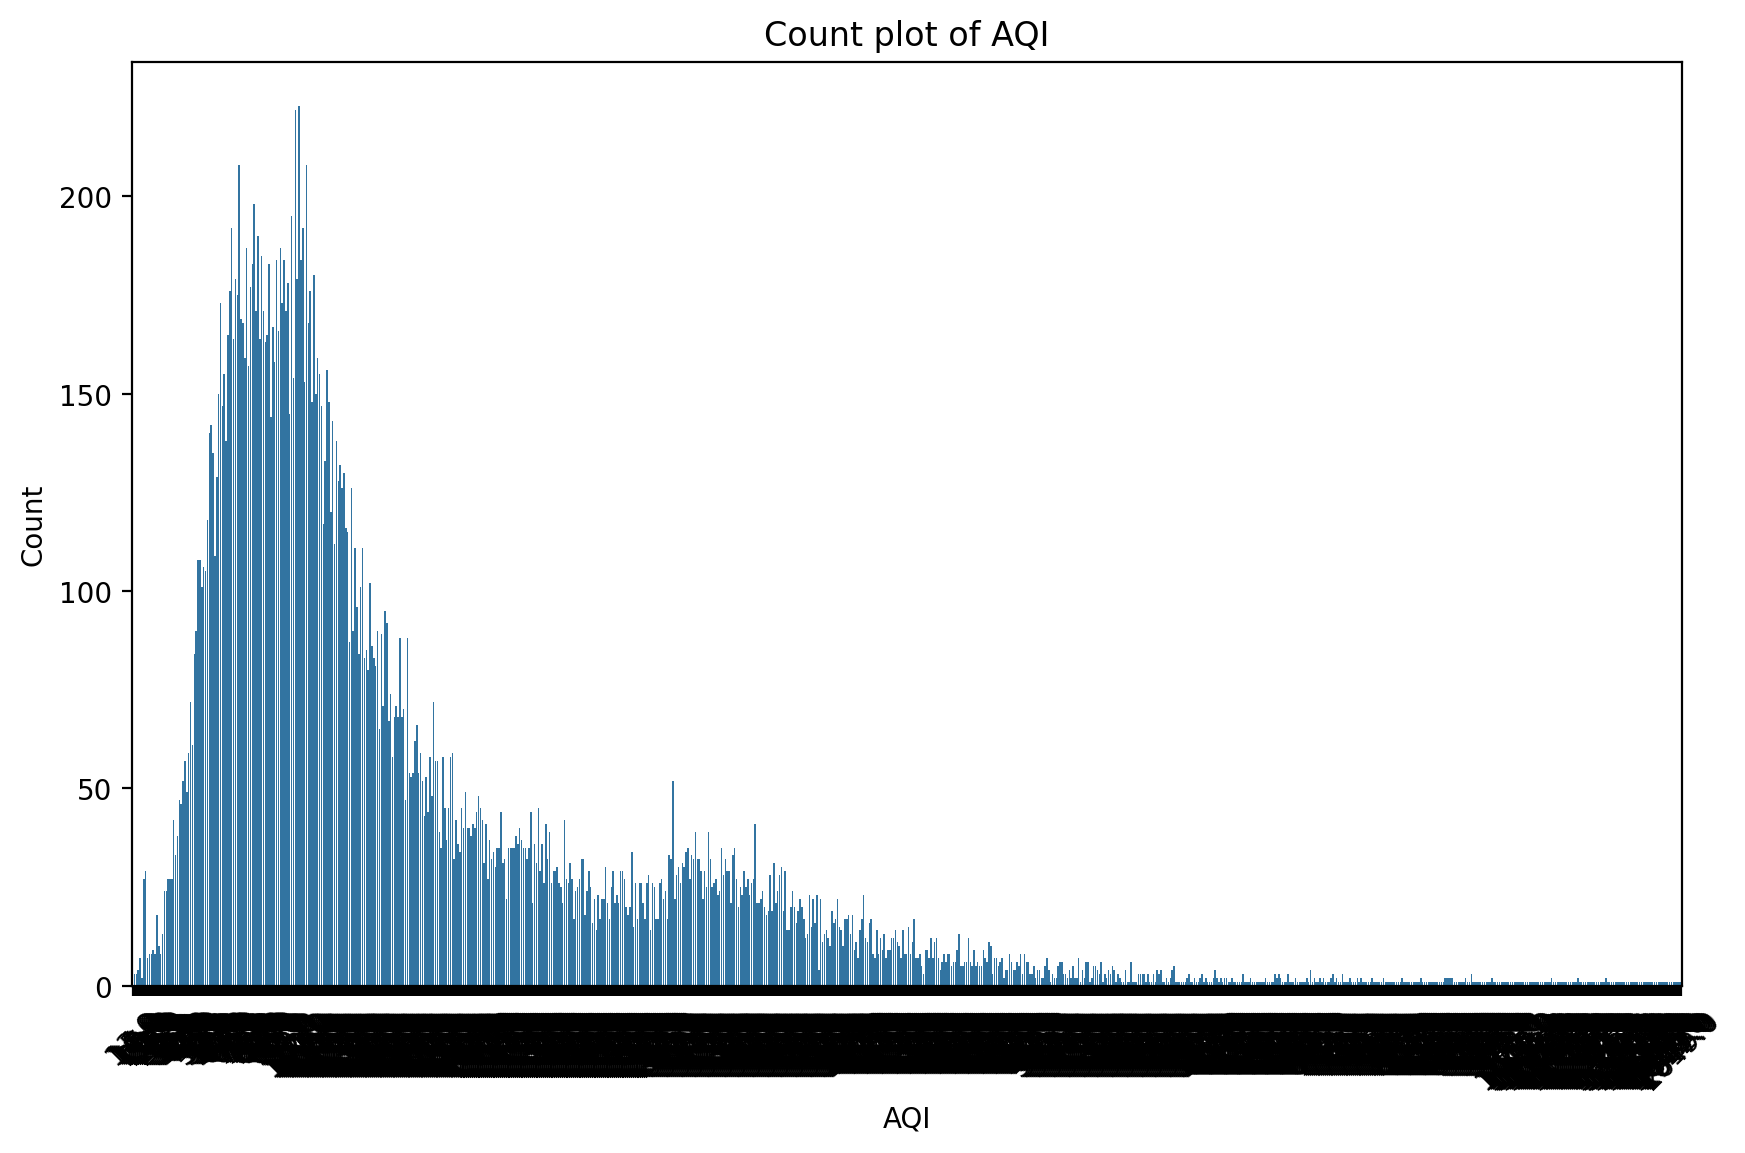

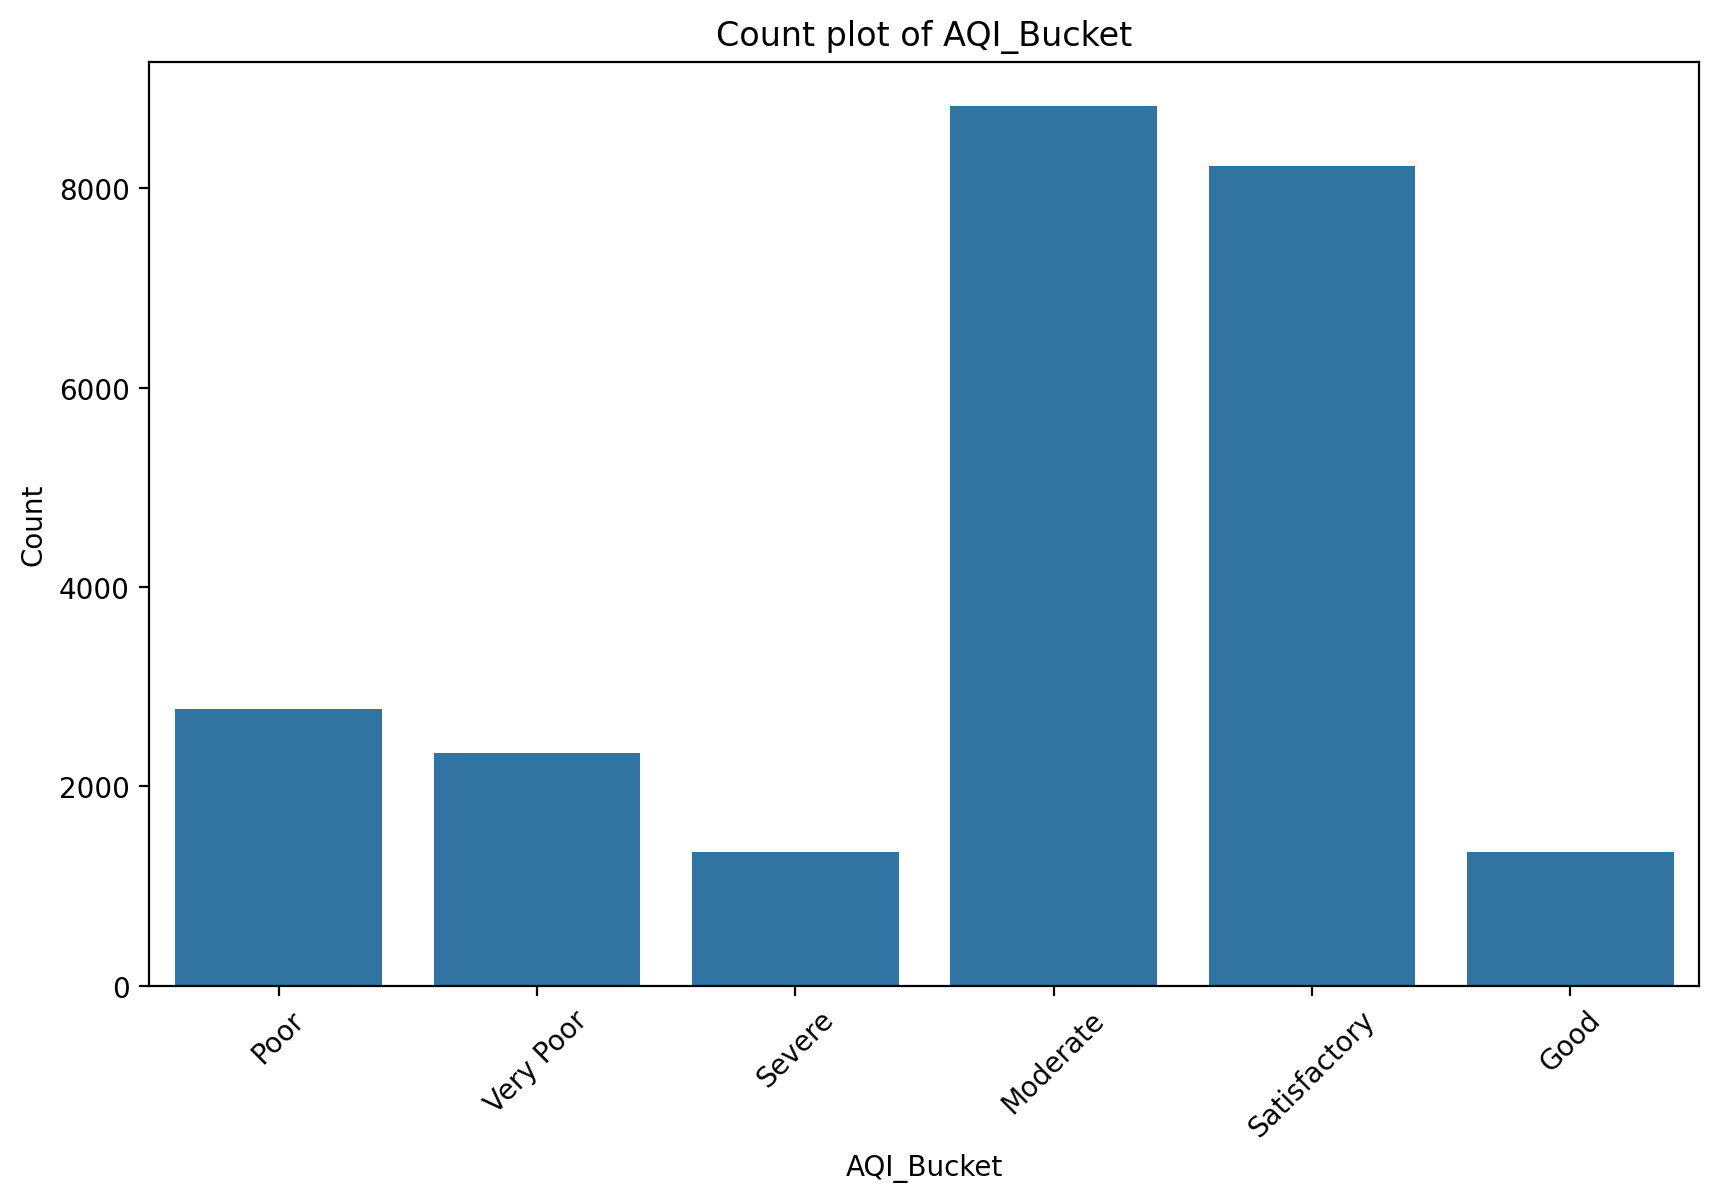

In [43]:
# Create count plots for categorical columns
for col in df:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


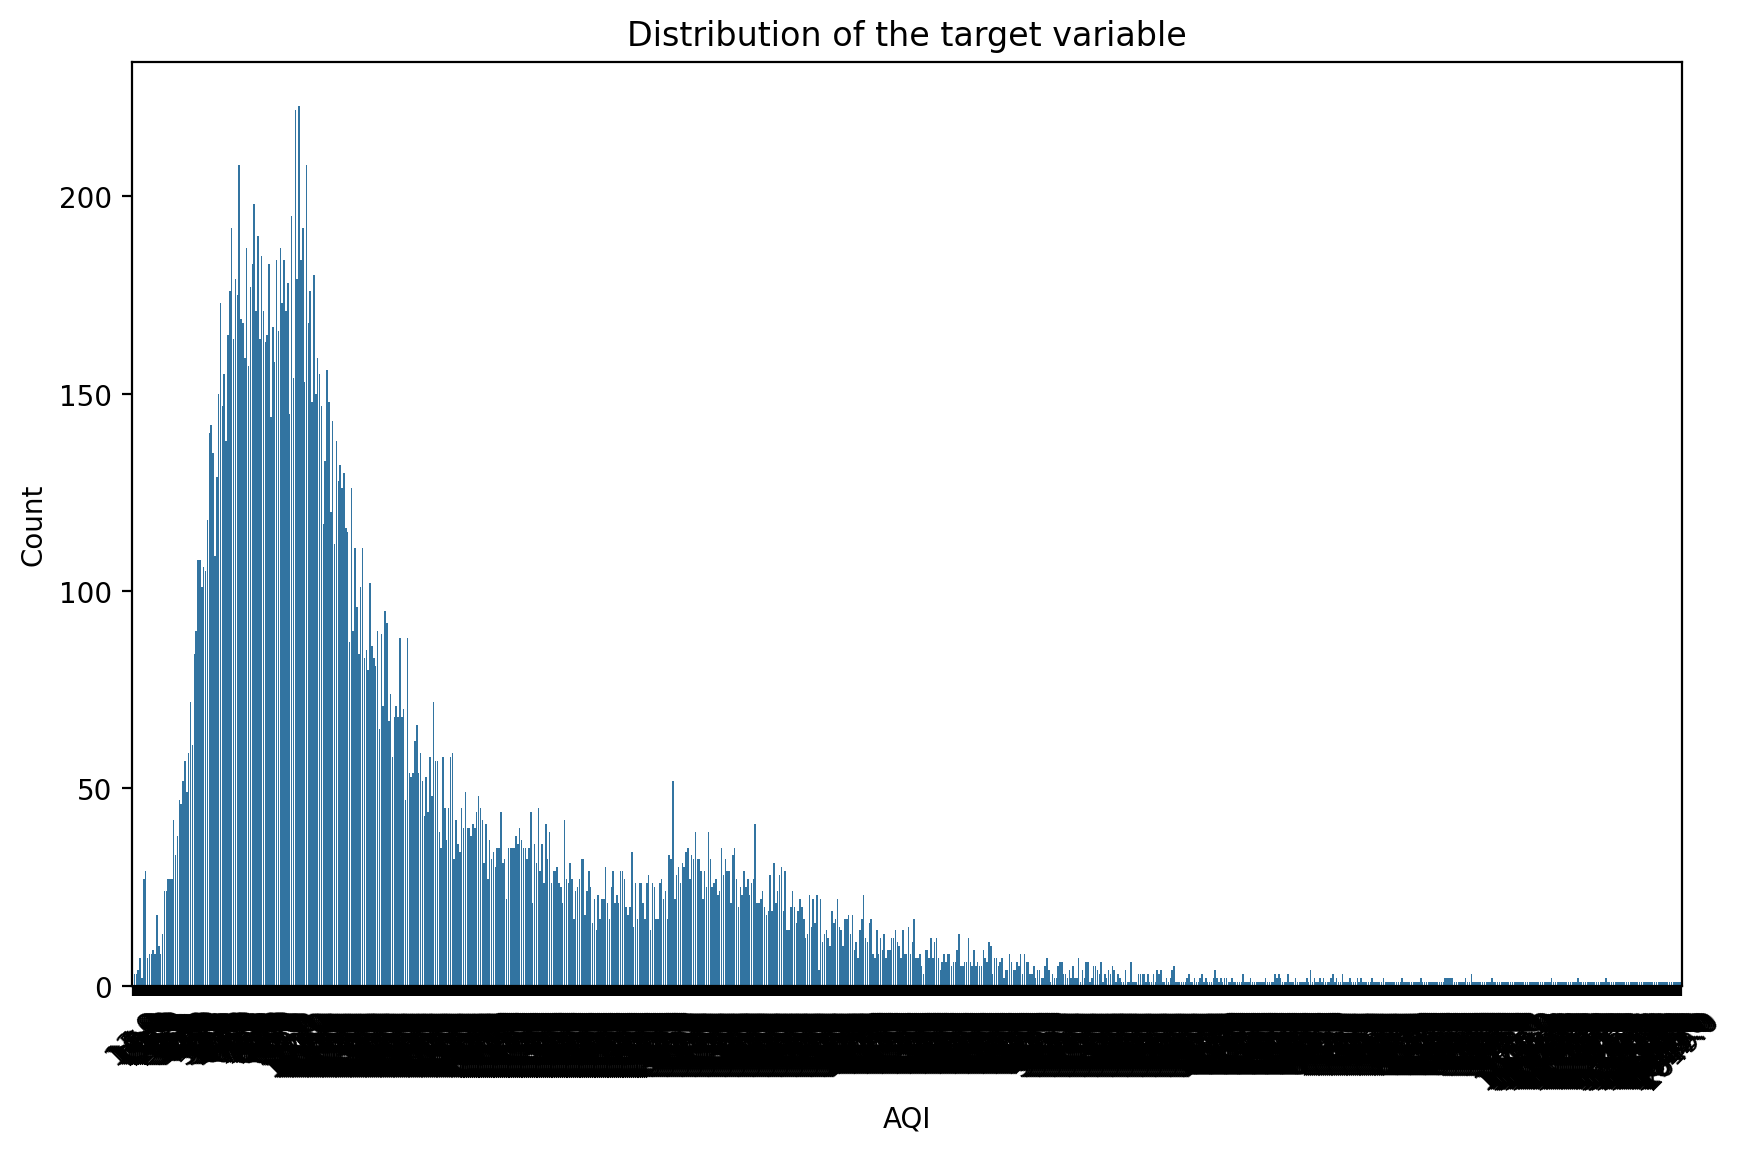

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AQI', data=df)
plt.title('Distribution of the target variable')
plt.xlabel('AQI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


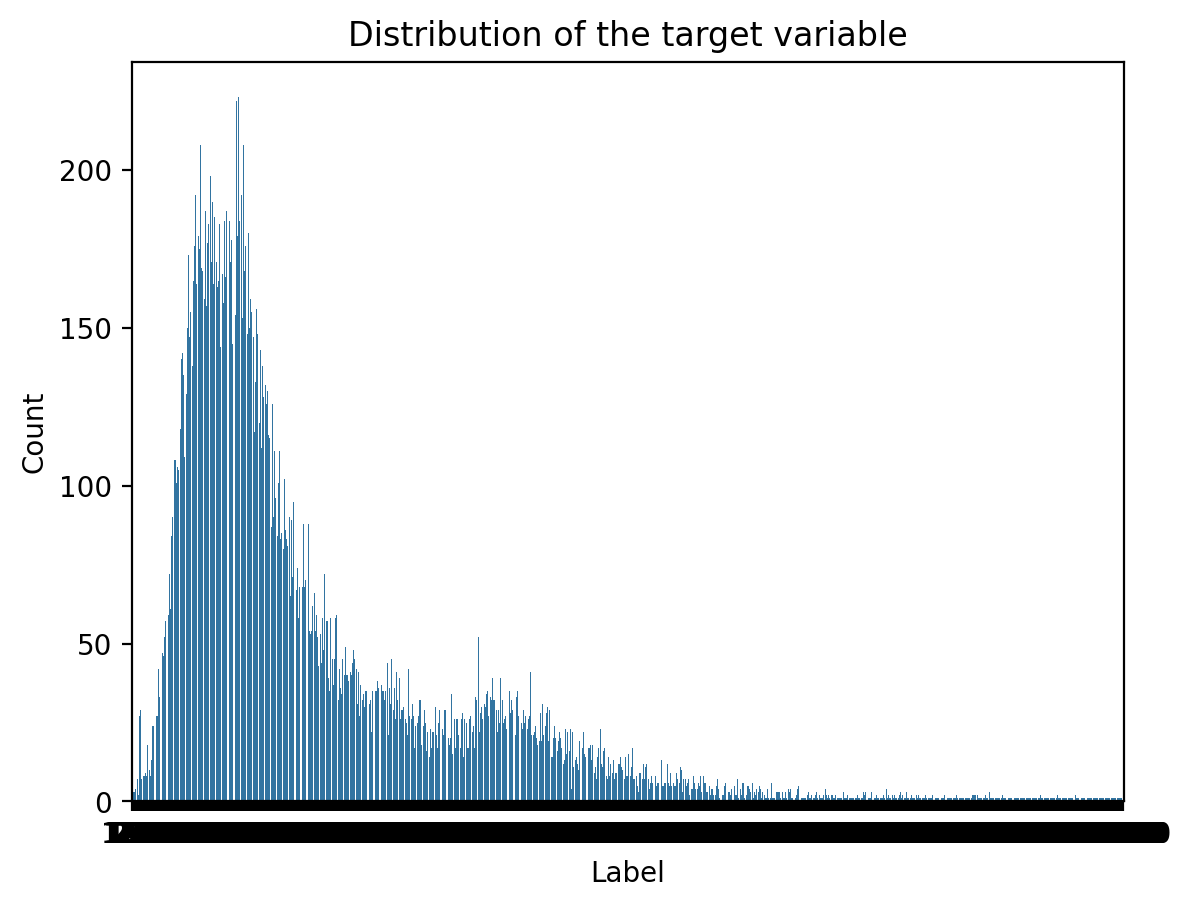

In [45]:

sns.countplot(x='AQI', data=df)

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

# Bar Plot

In [46]:
#To set overall visual style of the plots
sns.set_style('darkgrid')

In [47]:
#Finding category count using bar plot
c=df['AQI_Bucket'].value_counts()
c

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

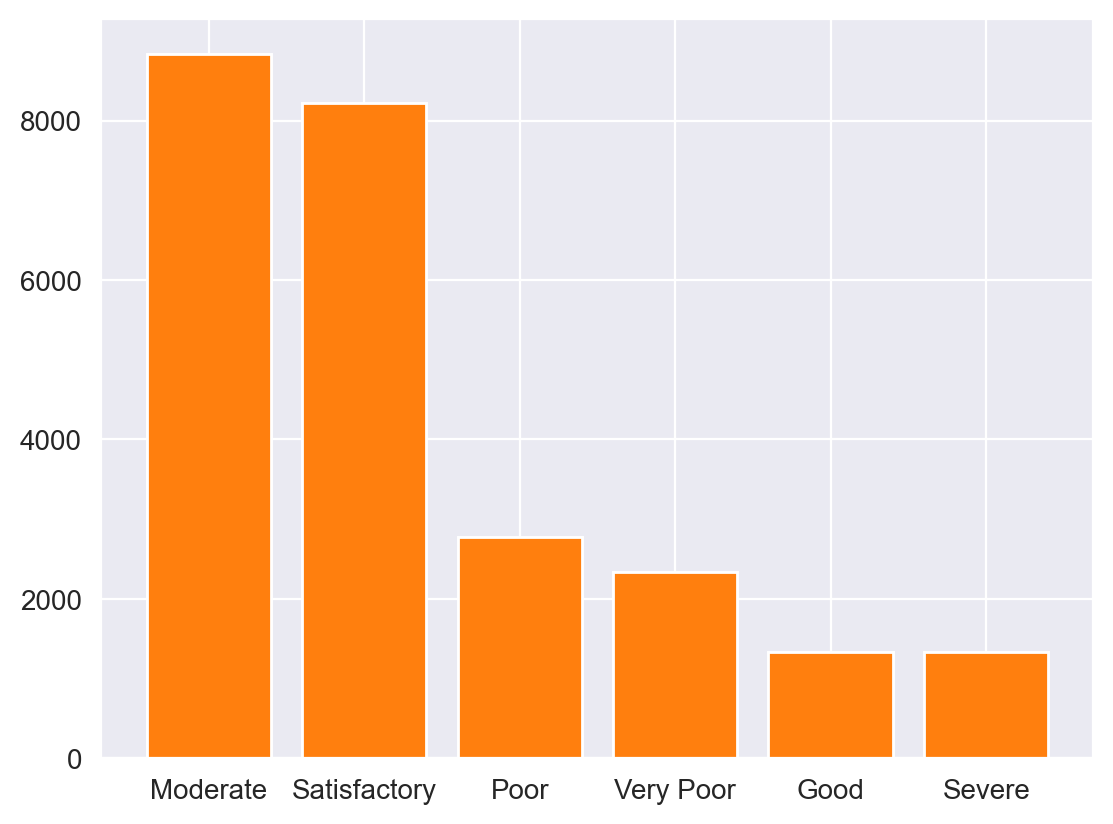

In [49]:
plt.bar(c.index,c.values)
plt.show()


# Count Plot

In [ ]:
#AQI- Count
#plt.figure(figsize=(12,6))
#sns.countplot(x='AQI',data=df,palette='rocket')
#plt.show()

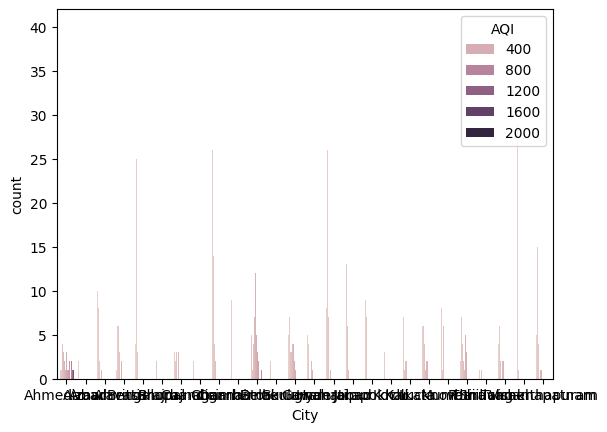

In [7]:
#sns.countplot(x="City", hue="AQI", data=df);
#For labeled column AQI Visualizing using countplot
sns.countplot(y=df['AQI'], palette=['skyblue', 'green', 'violet', 'black'])


# Box Plot
To view the distribution of various test scores among each categorical variables

<Axes: xlabel='City', ylabel='AQI_Bucket'>

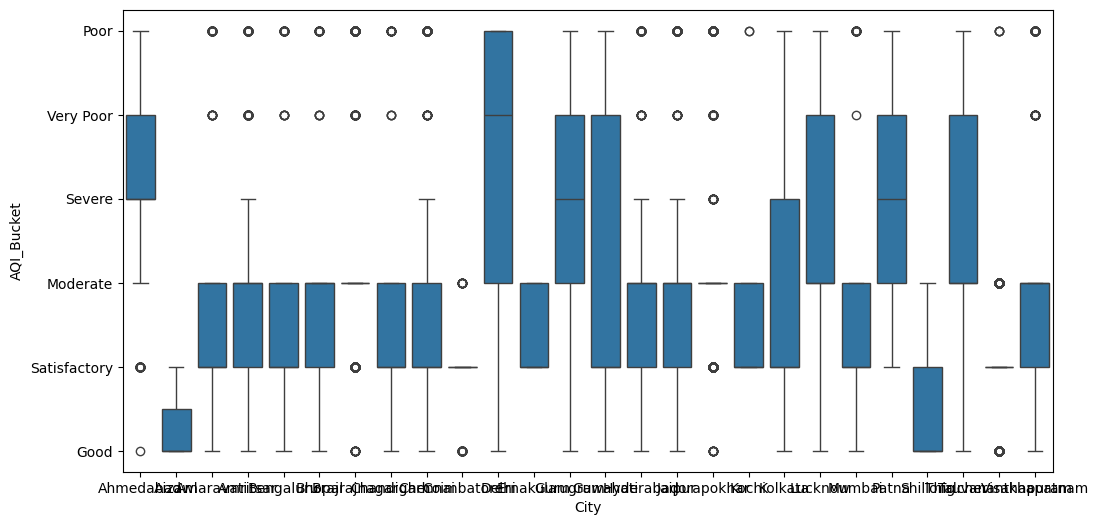

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='City',y='AQI_Bucket',data=df)

## Pair plot

In [ ]:
#sns.pairplot(df)

In [ ]:
sns.pairplot(df,hue='AQI')

In [ ]:
sns.pairplot(df,hue='AQI',diag_kind='hist')

In [ ]:
#heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.corr()['AQI']
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

In [ ]:
#scatterplot
plt.scatter(df.CO,df.AQI,color='green',marker='*')
plt.plot(df.NO,df.AQI,)
plt.plot

In [ ]:
#Distplot
#Showing the distributions
for column in numeric_columns.columns:
    sns.distplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()


# 7.Feature selection

In [ ]:
# Find correlation matrix
corr_matrix=df.corr()
corr_matrix


In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Remove multicolinearity (remove features with High correlation .85 to 1)
# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to identify highly correlated features
mask = (correlation_matrix > 0.85) & (correlation_matrix < 1.0)

# Drop the columns with high correlation
drop_columns = set()
for col in correlation_matrix.columns:
    correlated_features = correlation_matrix.index[mask[col]]
    drop_columns.update(correlated_features)

df_filtered = df.drop(columns=drop_columns)

# Display the DataFrame after removing highly correlated features
print("DataFrame after removing highly correlated features:")
print(df_filtered.head())


# 8.Feature Engeneering

# Label Encoding

The dataset includes categorical data, such as "City", "Date", and "AQI_Bucket". We perform 'Label Encoding' to convert these categorical values into numerical data.

Label Encoding assigns a unique numerical label to each category in a categorical feature. Algorithms used for computation, including those employed in machine learning, typically require numeric inputs for effective processing and analysis.

In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder=LabelEncoder()
cat_cols=['City','AQI_Bucket']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.tail(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.0,0.0,54.0,3
29530,25,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,0.0,0.0,50.0,0


In [97]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["City", "AQI_Bucket"])

print(df_one_hot_encoded )

        PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
28      83.13   0.00   6.93  28.71  33.72   0.00   6.93  49.52   59.76   
29      79.84   0.00  13.85  28.68  41.08   0.00  13.85  48.49   97.07   
30      94.52   0.00  24.39  32.66  52.61   0.00  24.39  67.39  111.33   
31     135.99   0.00  43.48  42.08  84.57   0.00  43.48  75.23  102.70   
32     178.33   0.00  54.56  35.31  72.80   0.00  54.56  55.04  107.38   
...       ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526   15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527   24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528   22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529   16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530   15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05   

       Benzene  ...  City_22  City_23  City_24  City_25  AQI_Bucket_0  \
28        0.02  ...    False    False 

In [98]:
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ["City", "AQI_Bucket"]
new_encoded_cols_names = []

# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols_names)

# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

print(df_one_hot_encoded)

['is_0', 'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9', 'is_10', 'is_11', 'is_12', 'is_13', 'is_14', 'is_15', 'is_16', 'is_17', 'is_18', 'is_19', 'is_20', 'is_21', 'is_22', 'is_23', 'is_24', 'is_25', 'is_2', 'is_5', 'is_4', 'is_1', 'is_3', 'is_0']
       City   PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
28        0   83.13   0.00   6.93  28.71  33.72   0.00   6.93  49.52   59.76   
29        0   79.84   0.00  13.85  28.68  41.08   0.00  13.85  48.49   97.07   
30        0   94.52   0.00  24.39  32.66  52.61   0.00  24.39  67.39  111.33   
31        0  135.99   0.00  43.48  42.08  84.57   0.00  43.48  75.23  102.70   
32        0  178.33   0.00  54.56  35.31  72.80   0.00  54.56  55.04  107.38   
...     ...     ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526    25   15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527    25   24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528  

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    df[i] = label_encoder.fit_transform(df[i])

In [100]:
df.City.value_counts()

City
10    1999
4     1910
19    1893
8     1884
14    1880
21    1459
12    1453
0     1334
25    1171
3     1126
15    1094
24    1052
2      841
20     775
16     771
18     754
6      713
23     698
13     495
9      344
7      299
5      278
22     205
17     158
11     153
1      111
Name: count, dtype: int64

# 9.Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a DataFrame
#data = pd.df
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame
data = pd.DataFrame({
    'age': [35, 45, 28, 52, 41],
    'income': [50000, 60000, 35000, 75000, 80000]
})

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(data)

# Transform the data
scaled_data = scaler.transform(data)

# Print the scaled data
print(scaled_data)


Next, let's look at another important feature – PM2.5. Let's also make a summary table and a picture.

Although it's not so obvious from the summary table, it's easy to see from the above plot that the AQI rate increases sharply AS PM2.5 increases

# 10.splitting into train and test data

Split Data into Training and Testing Sets:
    - Divide the dataset into training and testing subsets.

In [58]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [102]:
X=df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene','AQI_Bucket']]

In [103]:
Y=df['AQI']



11. **Build the ML Model:**
    - Implement various classification and regression algorithms:
      - Classification: Logistic Regression, SVM, Decision Tree, MLP Classifier, Naive Bayes, Random Forest, K-Nearest Neighbors, Gradient Boost, Adaboost.
      - Regression: SVR, MLP Regressor, Random Forest Regressor, Linear Regression, Gradient Boost, Adaboost.

12. **Model Evaluation:**
    - Regression Metrics: MAE, MSE, RMSE, R2 Score.
    - Classification Metrics: Confusion Matrix, Accuracy, Precision, Recall, F1-Score, ROC Curve.

13. **Hyperparameter Tuning:**
    - Optimize model performance by tuning hyperparameters.

14. **Save the Model:**
    - Save the trained model for future use.

15. **Test with Unseen Data:**
    - Assess the model's performance on unseen data.

16. **Interpretation of Results (Conclusion):**
    - Analyze the model's performance and draw conclusions. Discuss any limitations of the dataset.

17. **Future Work:**
    - Explore deep learning algorithms for potentially higher accuracy.
    - Update the model periodically with new data.
    - Address imbalanced data through resampling techniques.
    - Consider adding more features to enhance predictive power.

—----------------------------------------------------------------------------------------------------------------------------


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [105]:
#print(X.shape,X_train.shape,X_test.shape)
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr=RandomForestRegressor(max_depth=2,random_state=0)
regr.fit(X_train,Y_train)
print(regr.predict(X_test))

[ 85.34824035  85.34824035 186.39036675 ...  85.34824035  85.34824035
  85.34824035]


In [107]:
y_pred=regr.predict(X_test)

In [108]:
from sklearn.metrics import r2_score

In [109]:
r2_score(Y_test,y_pred)

0.8509391172224534

In [ ]:
14. Model Training
Train selected models using the training dataset.


In [82]:
#Scaling the data
#sc= StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
#X_train

In [ ]:
#Training using selected features:

# model building


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)




X1 = X_scaled[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'AQI', 'AQI_Bucket']]
Y1 = y


X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 1171)








results = []


# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X1_train, Y1_train)
lr_pred = lr_model.predict(X1_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(Y1_test, lr_pred),
    'Train Accuracy': accuracy_score(Y1_train, lr_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, lr_pred),
    'Recall': recall_score(Y1_test, lr_pred),
    'F1 score': f1_score(Y1_test, lr_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, lr_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, lr_pred)


}
results.append(lr_metrics)


# Random Forest
rf_model = RandomForestClassifier(min_samples_leaf=4, n_estimators=50)
rf_model.fit(X1_train, Y1_train)
rf_pred = rf_model.predict(X1_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(Y1_test, rf_pred),
    'Train Accuracy': accuracy_score(Y1_train, rf_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, rf_pred),
    'Recall': recall_score(Y1_test, rf_pred),
    'F1 score': f1_score(Y1_test, rf_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, rf_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, rf_pred)


}
results.append(rf_metrics)


# Decision Tree
dt_model = DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)
dt_model.fit(X1_train, Y1_train)
dt_pred = dt_model.predict(X1_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Test Accuracy': accuracy_score(Y1_test, dt_pred),
    'Train Accuracy': accuracy_score(Y1_train, dt_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, dt_pred),
    'Recall': recall_score(Y1_test, dt_pred),
    'F1 score': f1_score(Y1_test, dt_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, dt_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, dt_pred)
}
results.append(dt_metrics)


# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X1_train, Y1_train)
svm_pred = svm_model.predict(X1_test)
svm_metrics = {
    'Model': 'Support Vector Machine (SVM)',
    'Test Accuracy': accuracy_score(Y1_test, svm_pred),
    'Train Accuracy': accuracy_score(Y1_train, svm_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, svm_pred),
    'Recall': recall_score(Y1_test, svm_pred),
    'F1 score': f1_score(Y1_test, svm_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, svm_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, svm_pred)
}
results.append(svm_metrics)


# Multi-layer Perceptron (MLP) Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
mlp_model.fit(X1_train, Y1_train)
mlp_pred = mlp_model.predict(X1_test)
mlp_metrics = {
    'Model': 'Multi-layer Perceptron (MLP) Classifier',
    'Test Accuracy': accuracy_score(Y1_test, mlp_pred),
    'Train Accuracy': accuracy_score(Y1_train, mlp_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, mlp_pred),
    'Recall': recall_score(Y1_test, mlp_pred),
    'F1 score': f1_score(Y1_test, mlp_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, mlp_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, mlp_pred)
}
results.append(mlp_metrics)


# Gradient Boosting Machines
gbm_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)
gbm_model.fit(X1_train, Y1_train)
gbm_pred = gbm_model.predict(X1_test)
gbm_metrics = {
    'Model': 'Gradient Boosting Machines',
    'Test Accuracy': accuracy_score(Y1_test, gbm_pred),
    'Train Accuracy': accuracy_score(Y1_train, gbm_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, gbm_pred),
    'Recall': recall_score(Y1_test, gbm_pred),
    'F1 score': f1_score(Y1_test, gbm_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, gbm_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, gbm_pred)
}
results.append(gbm_metrics)


# Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X1_train, Y1_train)
nb_pred = nb_model.predict(X1_test)
nb_metrics = {
    'Model': 'Naive Bayes',
    'Test Accuracy': accuracy_score(Y1_test, nb_pred),
    'Train Accuracy': accuracy_score(Y1_train, nb_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, nb_pred),
    'Recall': recall_score(Y1_test, nb_pred),
    'F1 score': f1_score(Y1_test, nb_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, nb_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, nb_pred)
}
results.append(nb_metrics)


#  KNN Classifier


knn_model = KNeighborsClassifier(n_neighbors=16)
knn_model.fit(X1_train, Y1_train)
knn_pred = knn_model.predict(X1_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(Y1_test, knn_pred),
    'Train Accuracy': accuracy_score(Y1_train, knn_model.predict(X1_train)),
    'Precision': precision_score(Y1_test, knn_pred),
    'Recall': recall_score(Y1_test, knn_pred),
    'F1 score': f1_score(Y1_test, knn_pred),
    'Train confusion matrix': confusion_matrix(Y1_train, knn_model.predict(X1_train)),
    'Test confusion matrix': confusion_matrix(Y1_test, knn_pred)
}
results.append(knn_metrics)




# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df


Feature Selection
1.SelectKBest

In [54]:
#from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:


# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=15)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)


# Training using selected features:

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X1 = X_scaled[['City','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene',	'AQI_Bucket']]

y1 = y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 42)


# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X1_train, y1_train)
svr_predictions = svr_model.predict(X1_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X1_train, y1_train)
mlp_predictions = mlp_model.predict(X1_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X1_train, y1_train)
rf_predictions = rf_model.predict(X1_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)
lr_predictions = lr_model.predict(X1_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y1_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y1_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y1_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y1_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)



# 2. L1 Regularization

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=15)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)



# 3. Recursive Feature Elimination (RFE) with Random Forest Regressor

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=15, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]

print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)



# 4. Feature selection using Variance Threshold:

In [ ]:

from sklearn.feature_selection import VarianceThreshold

# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
X_variance = variance_selector.fit_transform(X_train)

# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]

# Print selected feature names
selected_features_variance = X_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)


# 11.Build the ML Model
    - Implement various classification and regression algorithms:
      - Classification: Logistic Regression, SVM, Decision Tree, MLP Classifier, Naive Bayes, Random Forest, K-Nearest Neighbors, Gradient Boost, Adaboost.
      - Regression: SVR, MLP Regressor, Random Forest Regressor, Linear Regression, Gradient Boost, Adaboost.


# LinearRegression

In [115]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [121]:
#predicting train
train_predict=model.predict(X_train)
#predicting on test
test_predict=model.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))

print("Rsquared value on train : ",model.score(X_train,Y_train))
print("Rsquared value on test : ",model.score(X_test,Y_test))

RMSE training data =  50.24050474659741
RMSE test data =  52.58224251488679
Rsquared value on train :  0.8335731045932855
Rsquared value on test :  0.828583694139787


# Random Forest Regressor

In [117]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [120]:
#predicting train
train_predict=RF.predict(X_train)
#predicting on test
test_predict=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))

print("Rsquared value on train : ",RF.score(X_train,Y_train))
print("Rsquared value on test : ",RF.score(X_test,Y_test))

RMSE training data =  7.887635846483549
RMSE test data =  20.79527445918714
Rsquared value on train :  0.9958978718082507
Rsquared value on test :  0.9731896034855234


# Decision tree Regressor

In [136]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)



DecisionTreeRegressor()

In [138]:
#predicting train
train_predict=DTR.predict(X_train)
#predicting on test
test_predict=DTR.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_predict)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_predict)))
print("RMSE training data = ",str(RMSE_train))
print("RMSE test data = ",str(RMSE_test))

print("Rsquared value on train : ",DTR.score(X_train,Y_train))
print("Rsquared value on test : ",DTR.score(X_test,Y_test))

RMSE training data =  0.5088667199757319
RMSE test data =  28.967251605025435
Rsquared value on train :  0.9999829264582244
Rsquared value on test :  0.9479778248503107


# 12. Hyperparameter Tuning
Optimize model hyperparameters using techniques like grid search or randomized search.


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



# Define hyperparameter grids for each model
svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Models
svr_model = SVR()
mlp_model = MLPRegressor()
rf_model = RandomForestRegressor()

# Hyperparameter tuning using GridSearchCV
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the models
svr_grid_search.fit(X_train, Y_train)
mlp_grid_search.fit(X_train, Y_train)
rf_grid_search.fit(X_train, Y_train)

# Evaluate on test set
svr_test_pred = svr_grid_search.predict(X_test)
mlp_test_pred = mlp_grid_search.predict(X_test)
rf_test_pred = rf_grid_search.predict(X_test)

# Calculate test MSE
svr_test_mse = mean_squared_error(Y_test, svr_test_pred)
mlp_test_mse = mean_squared_error(Y_test, mlp_test_pred)
rf_test_mse = mean_squared_error(Y_test, rf_test_pred)

# Print test MSE
print("SVR Test MSE:", svr_test_mse)
print("MLPRegressor Test MSE:", mlp_test_mse)
print("Random Forest Test MSE:", rf_test_mse)

# Print best hyperparameters and best score for each model
print("SVR Best Hyperparameters:", svr_grid_search.best_params_)
print("SVR Best Score:", svr_grid_search.best_score_)

print("MLPRegressor Best Hyperparameters:", mlp_grid_search.best_params_)
print("MLPRegressor Best Score:", mlp_grid_search.best_score_)

print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


# 13. Conclusion and Future Work
Air pollution is a global problem; researchers from all around the world are working to discover a solution. To accurately forecast the AQI, machine learning techniques were investigated. The present study assessed the performance of the three best data mining models (SVR, RFR, and CR) for predicting the accurate AQI data in some of India’s most populous and polluted cities. The synthetic minority oversampling technique (SMOTE) was used to equalize the class data to get better and consistent results. This unique approach of balancing the datasets, then using them, and then carefully comparing the results of both imbalanced and balanced ones for being highly accurate and then using statistical methods such as RMSE, MAE, MSE, and R-SQUARE to confirm the better results were very clearly successful in getting higher accuracy. The fresh research on balanced versus imbalance datasets used in such an application is well-tabulated and can be used as a reference for further research.
So, it seems that in the use case of AQI in India, the CatBoost and random forest algorithms, coupled with SMOTE applied datasets, can provide great results to estimate air quality, which can prompt local and national governments, as well as other civic bodies to act and regulate the air quality. As very evident from the abovementioned metrics, the application of these regression models on the 2015 to 2020 AQI data has been successful in demonstrating that our innovation of using the SMOTE algorithm has paid off well and increased the accuracy values of these regression models. This innovative approach can be applied to future research and its benefits reaped.

For future work, there are plans to use satellite imagery and more extensive data to provide estimations for individual areas of a city as well. Another avenue to explore would be artificial intelligence (AI) to make the models more effective and innovative. This would help in figuring out which industrial areas contribute the most to pollution. Extending the study and trying new algorithms would also make our work more detailed. The aim is to find patterns and provide solutions on how to improve the air quality index of a city. The factors that contribute the most and ways to minimize them in an efficient way are an area worth exploring. In addition, further analyzing our dataset more to see if there are any intriguing patterns, such as the AQI’s increase or reduction level during the holidays, or particular months and seasons, will be fruitful for our cause.

# 14 Limitations:
Data Quality, Missing Data, Irrelevant or random data, Insufficient Data, Imbalanced Data and Disproportionate class distribution can bias the model toward the majority class.this gives quite a clear picture of the importance of balanced datasets. Having a dataset properly balanced can give more equal importance to each class. If there is too much of a gap between the number of values present for each class, it does not give an accurate portrayal of the actual scenario, and hence, the model fails. SMOTE creates multiple synthetic examples for the minority class and brings about a balance to the dataset. This makes the models work to the best of their ability, hence bringing better accuracy. This paper, hence makes clear about the importance of using SMOTE-applied datasets.